#OBJECTIVE:
To create an employee cluster to show absenteeism at work and try to identify the top contributors for it


# Import libraries.

In [ ]:
# general imports
import pandas as pd
import numpy as np
from matplotlib import pyplot
from numpy import mean
from numpy import std
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sb
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load The Data.

In [ ]:
df=pd.read_csv('/content/DS3_C6_S3_Clustering_AbsenteeismAtWork_Data_Project.csv',sep=";")

In [ ]:
df

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0    11                  26                 7                3        1   
1    36                   0                 7                3        1   
2     3                  23                 7                4        1   
3     7                   7                 7                5        1   
4    11                  23                 7                5        1   
..   ..                 ...               ...              ...      ...   
735  11                  14                 7                3        1   
736   1                  11                 7                3        1   
737   4                   0                 0                3        1   
738   8                   0                 0                4        2   
739  35                   0                 0                6        3   

     Transportation expense  Distance from Residence to Work  Service time  \
0                       289                               36            13   
1                       118                               13            18   
2                       179                               51            18   
3                       279                                5            14   
4                       289                               36            13   
..                      ...                              ...           ...   
735                     289                               36            13   
736                     235                               11            14   
737                     118                               14            13   
738                     231                               35            14   
739                     179                               45            14   

     Age  Work load Average/day   ...  Disciplinary failure  Education  Son  \
0     33                 239.554  ...                     0          1    2   
1     50                 239.554  ...                     1          1    1   
2     38                 239.554  ...                     0          1    0   
3     39                 239.554  ...                     0          1    2   
4     33                 239.554  ...                     0          1    2   
..   ...                     ...  ...                   ...        ...  ...   
735   33                 264.604  ...                     0          1    2   
736   37                 264.604  ...                     0          3    1   
737   40                 271.219  ...                     0          1    1   
738   39                 271.219  ...                     0          1    2   
739   53                 271.219  ...                     0          1    1   

     Social drinker  Social smoker  Pet  Weight  Height  Body mass index  \
0                 1              0    1      90     172               30   
1                 1              0    0      98     178               31   
2                 1              0    0      89     170               31   
3                 1              1    0      68     168               24   
4                 1              0    1      90     172               30   
..              ...            ...  ...     ...     ...              ...   
735               1              0    1      90     172               30   
736               0              0    1      88     172               29   
737               1              0    8      98     170               34   
738               1              0    2     100     170               35   
739               0              0    1      77     175               25   

     Absenteeism time in hours  
0                            4  
1                            0  
2                            2  
3                            4  
4                            2  
..                         ...  
735                          8  
736                          4  
737     

In [ ]:
def cal_missing_value(df):
    total=df.isnull().sum().sort_values(ascending=False)
    percentage=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data=pd.concat([total,percentage], axis=1, keys=['Total','Percentage'])
    return missing_data

In [ ]:
cal_missing_value(df)

Total  Percentage
ID                                   0         0.0
Disciplinary failure                 0         0.0
Body mass index                      0         0.0
Height                               0         0.0
Weight                               0         0.0
Pet                                  0         0.0
Social smoker                        0         0.0
Social drinker                       0         0.0
Son                                  0         0.0
Education                            0         0.0
Hit target                           0         0.0
Reason for absence                   0         0.0
Work load Average/day                0         0.0
Age                                  0         0.0
Service time                         0         0.0
Distance from Residence to Work      0         0.0
Transportation expense               0         0.0
Seasons                              0         0.0
Day of the week                      0         0.0
Month of absence                     0         0.0
Absenteeism time in hours            0         0.0

In [ ]:
df.dtypes

ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object

# Conclusion:
All of the columns are numerical.


In [ ]:
num_data=df.select_dtypes(include=np.number)
num_data

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0    11                  26                 7                3        1   
1    36                   0                 7                3        1   
2     3                  23                 7                4        1   
3     7                   7                 7                5        1   
4    11                  23                 7                5        1   
..   ..                 ...               ...              ...      ...   
735  11                  14                 7                3        1   
736   1                  11                 7                3        1   
737   4                   0                 0                3        1   
738   8                   0                 0                4        2   
739  35                   0                 0                6        3   

     Transportation expense  Distance from Residence to Work  Service time  \
0                       289                               36            13   
1                       118                               13            18   
2                       179                               51            18   
3                       279                                5            14   
4                       289                               36            13   
..                      ...                              ...           ...   
735                     289                               36            13   
736                     235                               11            14   
737                     118                               14            13   
738                     231                               35            14   
739                     179                               45            14   

     Age  Work load Average/day   ...  Disciplinary failure  Education  Son  \
0     33                 239.554  ...                     0          1    2   
1     50                 239.554  ...                     1          1    1   
2     38                 239.554  ...                     0          1    0   
3     39                 239.554  ...                     0          1    2   
4     33                 239.554  ...                     0          1    2   
..   ...                     ...  ...                   ...        ...  ...   
735   33                 264.604  ...                     0          1    2   
736   37                 264.604  ...                     0          3    1   
737   40                 271.219  ...                     0          1    1   
738   39                 271.219  ...                     0          1    2   
739   53                 271.219  ...                     0          1    1   

     Social drinker  Social smoker  Pet  Weight  Height  Body mass index  \
0                 1              0    1      90     172               30   
1                 1              0    0      98     178               31   
2                 1              0    0      89     170               31   
3                 1              1    0      68     168               24   
4                 1              0    1      90     172               30   
..              ...            ...  ...     ...     ...              ...   
735               1              0    1      90     172               30   
736               0              0    1      88     172               29   
737               1              0    8      98     170               34   
738               1              0    2     100     170               35   
739               0              0    1      77     175               25   

     Absenteeism time in hours  
0                            4  
1                            0  
2                            2  
3                            4  
4                            2  
..                         ...  
735                          8  
736                          4  
737     

# Making Bins.
Since there is no class label column defined but for the lda to work require class label so making one , i am choosing reason for absence columns ,because objective is to cluster the dataset  to get the important  factor for absence. 

 Grouped 0 to 10 as 0 , 10 to 20 as 1 and 21 to 30.

since we have convert the class label which is defined to numeric i first itself in a numeric class.

In [ ]:
A=df['Reason for absence'].min()
B=df['Reason for absence'].max()
print('minimum reason for absence',A)
print('max reason for absence',B)

minimum reason for absence 0
max reason for absence 28


In [ ]:
bins=[-1,10,20,30]
labels = ['0','1','2']
df['binned'] = pd.cut(df['Reason for absence'], bins=bins, labels=labels)
df

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0    11                  26                 7                3        1   
1    36                   0                 7                3        1   
2     3                  23                 7                4        1   
3     7                   7                 7                5        1   
4    11                  23                 7                5        1   
..   ..                 ...               ...              ...      ...   
735  11                  14                 7                3        1   
736   1                  11                 7                3        1   
737   4                   0                 0                3        1   
738   8                   0                 0                4        2   
739  35                   0                 0                6        3   

     Transportation expense  Distance from Residence to Work  Service time  \
0                       289                               36            13   
1                       118                               13            18   
2                       179                               51            18   
3                       279                                5            14   
4                       289                               36            13   
..                      ...                              ...           ...   
735                     289                               36            13   
736                     235                               11            14   
737                     118                               14            13   
738                     231                               35            14   
739                     179                               45            14   

     Age  Work load Average/day   ...  Education  Son  Social drinker  \
0     33                 239.554  ...          1    2               1   
1     50                 239.554  ...          1    1               1   
2     38                 239.554  ...          1    0               1   
3     39                 239.554  ...          1    2               1   
4     33                 239.554  ...          1    2               1   
..   ...                     ...  ...        ...  ...             ...   
735   33                 264.604  ...          1    2               1   
736   37                 264.604  ...          3    1               0   
737   40                 271.219  ...          1    1               1   
738   39                 271.219  ...          1    2               1   
739   53                 271.219  ...          1    1               0   

     Social smoker  Pet  Weight  Height  Body mass index  \
0                0    1      90     172               30   
1                0    0      98     178               31   
2                0    0      89     170               31   
3                1    0      68     168               24   
4                0    1      90     172               30   
..             ...  ...     ...     ...              ...   
735              0    1      90     172               30   
736              0    1      88     172               29   
737              0    8      98     170               34   
738              0    2     100     170               35   
739              0    1      77     175               25   

     Absenteeism time in hours  binned  
0                            4       2  
1                            0       0  
2                            2       2  
3                            4       0  
4                            2       2  
..                         ...     ...  
735                          8       1  
736                          4       1  
737                          0       0  
738                          0       0  
739                          0       0  

[740 rows x 22 columns]

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['binned']=label_encoder.fit_transform(df['binned'])

In [ ]:
for cols in list(num_data.columns):
  print(num_data[cols].value_counts())
  print('------------------------------')

3     113
28     76
34     55
22     46
20     42
11     40
15     37
36     34
24     30
14     29
33     24
10     24
1      23
17     20
5      19
18     16
13     15
25     10
9       8
6       8
23      8
27      7
12      7
30      7
2       6
7       6
26      5
32      5
29      5
19      3
21      3
31      3
8       2
16      2
4       1
35      1
Name: ID, dtype: int64
------------------------------
23    149
28    112
27     69
13     55
0      43
19     40
22     38
26     33
25     31
11     26
10     25
18     21
14     19
1      16
7      15
6       8
12      8
21      6
8       6
9       4
5       3
16      3
24      3
15      2
4       2
3       1
2       1
17      1
Name: Reason for absence, dtype: int64
------------------------------
3     87
2     72
10    71
7     67
5     64
11    63
8     54
6     54
9     53
4     53
1     50
12    49
0      3
Name: Month of absence, dtype: int64
------------------------------
2    161
4    156
3    154
6    144
5    125
Name: 

# Conclusion:
In the the month column there is number 0 ,in month there cannot be 0 so will have to impute it with mode of the that column.

In [ ]:
df['Month of absence']=df['Month of absence'].replace(to_replace=0,value=df['Month of absence'].mode()[0])

In [ ]:
df['Month of absence'].value_counts()

3     90
2     72
10    71
7     67
5     64
11    63
8     54
6     54
9     53
4     53
1     50
12    49
Name: Month of absence, dtype: int64

#Conclusion:
There is no null values or noise in the dataset ,so will process further scalling the data.

# Scaling the data.

Before that  removed the binned and Reason for absence,since is not required.

In [ ]:
df1=df.drop(columns={'Reason for absence','binned'})

In [ ]:
scaler=StandardScaler()
df_scaled =pd.DataFrame(scaler.fit_transform(df1.to_numpy()),columns=df1.columns)

In [ ]:
df_scaled

ID  Month of absence  Day of the week   Seasons  \
0   -0.637161          0.194191        -0.643947 -1.390175   
1    1.632719          0.194191        -0.643947 -1.390175   
2   -1.363523          0.194191         0.059924 -1.390175   
3   -1.000342          0.194191         0.763796 -1.390175   
4   -0.637161          0.194191         0.763796 -1.390175   
..        ...               ...              ...       ...   
735 -0.637161          0.194191        -0.643947 -1.390175   
736 -1.545113          0.194191        -0.643947 -1.390175   
737 -1.272728         -0.976491        -0.643947 -1.390175   
738 -0.909547         -0.976491         0.059924 -0.490149   
739  1.541923         -0.976491         1.467667  0.409877   

     Transportation expense  Distance from Residence to Work  Service time  \
0                  1.011408                         0.429556      0.101770   
1                 -1.544379                        -1.121694      1.242825   
2                 -0.632665                         1.441240      1.242825   
3                  0.861947                        -1.661258      0.329981   
4                  1.011408                         0.429556      0.101770   
..                      ...                              ...           ...   
735                1.011408                         0.429556      0.101770   
736                0.204318                        -1.256585      0.329981   
737               -1.544379                        -1.054248      0.101770   
738                0.144533                         0.362110      0.329981   
739               -0.632665                         1.036566      0.329981   

          Age  Work load Average/day   Hit target  Disciplinary failure  \
0   -0.532868               -0.818212    0.638686             -0.239046   
1    2.092860               -0.818212    0.638686              4.183300   
2    0.239405               -0.818212    0.638686             -0.239046   
3    0.393859               -0.818212    0.638686             -0.239046   
4   -0.532868               -0.818212    0.638686             -0.239046   
..        ...                     ...         ...                   ...   
735 -0.532868               -0.176427   -0.420423             -0.239046   
736  0.084950               -0.176427   -0.420423             -0.239046   
737  0.548314               -0.006949    0.109131             -0.239046   
738  0.393859               -0.006949    0.109131             -0.239046   
739  2.556224               -0.006949    0.109131             -0.239046   

     Education       Son  Social drinker  Social smoker       Pet    Weight  \
0    -0.433857  0.893723        0.872872      -0.280566  0.192850  0.851673   
1    -0.433857 -0.017234        0.872872      -0.280566 -0.566240  1.473056   
2    -0.433857 -0.928191        0.872872      -0.280566 -0.566240  0.774000   
3    -0.433857  0.893723        0.872872       3.564226 -0.566240 -0.857131   
4    -0.433857  0.893723        0.872872      -0.280566  0.192850  0.851673   
..         ...       ...             ...            ...       ...       ...   
735  -0.433857  0.893723        0.872872      -0.280566  0.192850  0.851673   
736   2.538869 -0.017234       -1.145644      -0.280566  0.192850  0.696327   
737  -0.433857 -0.017234        0.872872      -0.280566  5.506478  1.473056   
738  -0.433857  0.893723        0.872872      -0.280566  0.951940  1.628402   
739  -0.433857 -0.017234       -1.145644      -0.280566  0.192850 -0.158075   

       Height  Body mass index  Absenteeism time in hours  
0   -0.019046         0.775932                  -0.219511  
1    0.975828         1.009438                  -0.519767  
2   -0.350671         1.009438                  -0.369639  
3   -0.682295        -0.625100                  -0.219511  
4   -0.019046         0.775932                  -0.369639  
..        ...              ...                        ...  
735 -0.019046         0.775932                   0.080744  

Here then joined it again after scaling.


In [ ]:
df_scaled1=df_scaled.join(df['binned'])

# Data Visualization

# Univariate Analysis.

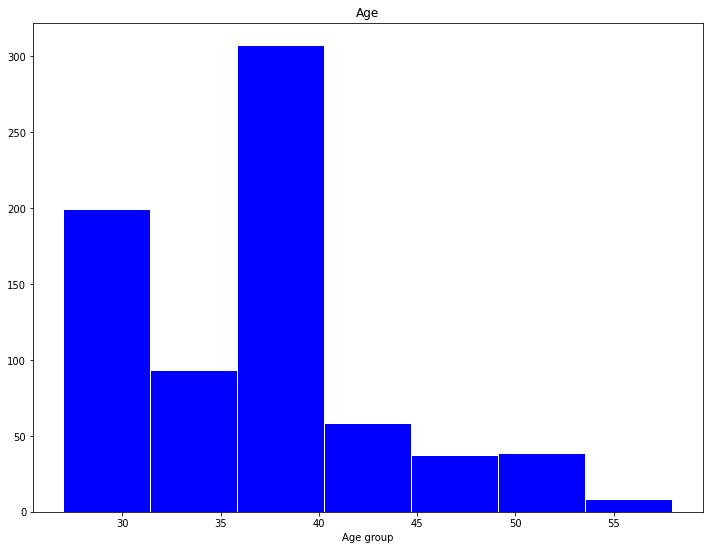

In [ ]:
plt.figure(figsize=(12,9))
plt.hist(df['Age'],bins=7,rwidth=0.99,color='b')
plt.title('Age')
plt.xlabel('Age group')
plt.show()

# Conclusion:
Here we can see that most of the people are from age group 35 to 40.

In [ ]:
df

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0    11                  26                 7                3        1   
1    36                   0                 7                3        1   
2     3                  23                 7                4        1   
3     7                   7                 7                5        1   
4    11                  23                 7                5        1   
..   ..                 ...               ...              ...      ...   
735  11                  14                 7                3        1   
736   1                  11                 7                3        1   
737   4                   0                 3                3        1   
738   8                   0                 3                4        2   
739  35                   0                 3                6        3   

     Transportation expense  Distance from Residence to Work  Service time  \
0                       289                               36            13   
1                       118                               13            18   
2                       179                               51            18   
3                       279                                5            14   
4                       289                               36            13   
..                      ...                              ...           ...   
735                     289                               36            13   
736                     235                               11            14   
737                     118                               14            13   
738                     231                               35            14   
739                     179                               45            14   

     Age  Work load Average/day   ...  Education  Son  Social drinker  \
0     33                 239.554  ...          1    2               1   
1     50                 239.554  ...          1    1               1   
2     38                 239.554  ...          1    0               1   
3     39                 239.554  ...          1    2               1   
4     33                 239.554  ...          1    2               1   
..   ...                     ...  ...        ...  ...             ...   
735   33                 264.604  ...          1    2               1   
736   37                 264.604  ...          3    1               0   
737   40                 271.219  ...          1    1               1   
738   39                 271.219  ...          1    2               1   
739   53                 271.219  ...          1    1               0   

     Social smoker  Pet  Weight  Height  Body mass index  \
0                0    1      90     172               30   
1                0    0      98     178               31   
2                0    0      89     170               31   
3                1    0      68     168               24   
4                0    1      90     172               30   
..             ...  ...     ...     ...              ...   
735              0    1      90     172               30   
736              0    1      88     172               29   
737              0    8      98     170               34   
738              0    2     100     170               35   
739              0    1      77     175               25   

     Absenteeism time in hours  binned  
0                            4       2  
1                            0       0  
2                            2       2  
3                            4       0  
4                            2       2  
..                         ...     ...  
735                          8       1  
736                          4       1  
737                          0       0  
738                          0       0  
739                          0       0  

[740 rows x 22 columns]

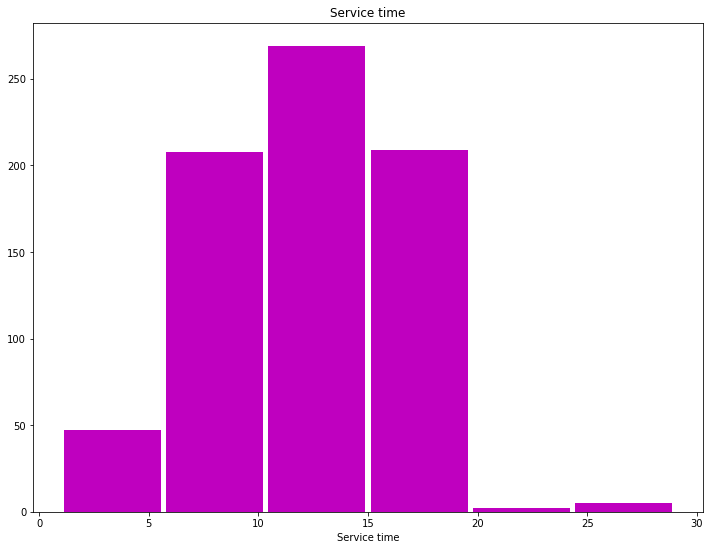

In [ ]:
plt.figure(figsize=(12,9))
plt.hist(df['Service time'],bins=6,rwidth=0.95,color='m')
plt.title('Service time')
plt.xlabel('Service time')
plt.show()

# Conclusion:
Here we can see most of the empoloyee who have in service from 10 to 15 years

In [ ]:
plt.figure(figsize=(20,10))
A1=df["Social smoker"].value_counts()
B1=list(df["Social smoker"].value_counts().index)
plt.pie(A1,labels=B1,autopct='%.2f%%', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' } )
plt.show()

# Conclusion:
Most of the employee are non smokers.

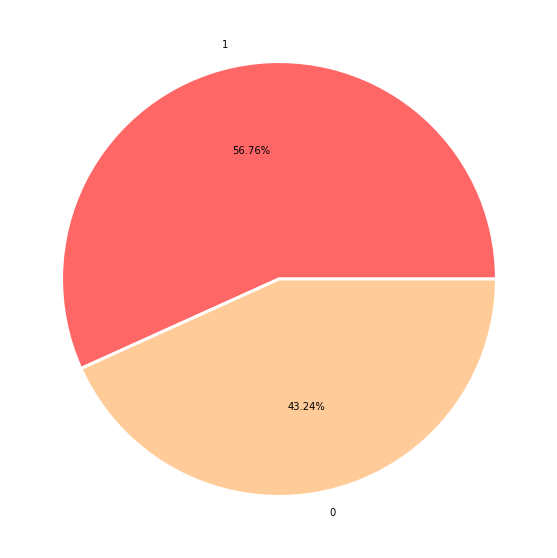

In [ ]:
plt.figure(figsize=(20,10))
colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff']
A2=df["Social drinker"].value_counts()
B2=list(df["Social drinker"].value_counts().index)
plt.pie(A2,labels=B2,autopct='%.2f%%', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },colors=colors )
plt.show()

# Conclusion:
Most of the employees are social drinker.

In [ ]:
plt.figure(figsize=(12,9))
sb.countplot(df['Disciplinary failure'],palette='OrRd_r')
plt.show()

# Conclusion:
Most employee don't have  Disciplinary issues.


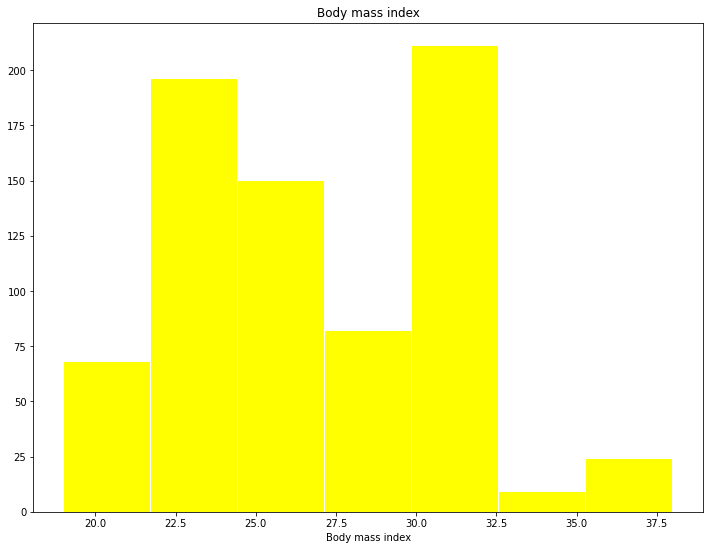

In [ ]:
plt.figure(figsize=(12,9))
plt.hist(df['Body mass index'],bins=7,rwidth=0.99,color='yellow')
plt.title('Body mass index')
plt.xlabel('Body mass index')
plt.show()

In [ ]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours', 'binned'],
      dtype='object')

# Conclusion:
Here we can see that most of the employees are obese falling in range between 30 to 32.5.

# Bivariate Analysis.

In [ ]:
plt.figure(figsize=(12,9))
sb.boxplot(data=df,x='Disciplinary failure',y='Age',showmeans=True,palette='Greens_r')
plt.show()

# Conclusion:
The  employees who violate discipline have high average age .

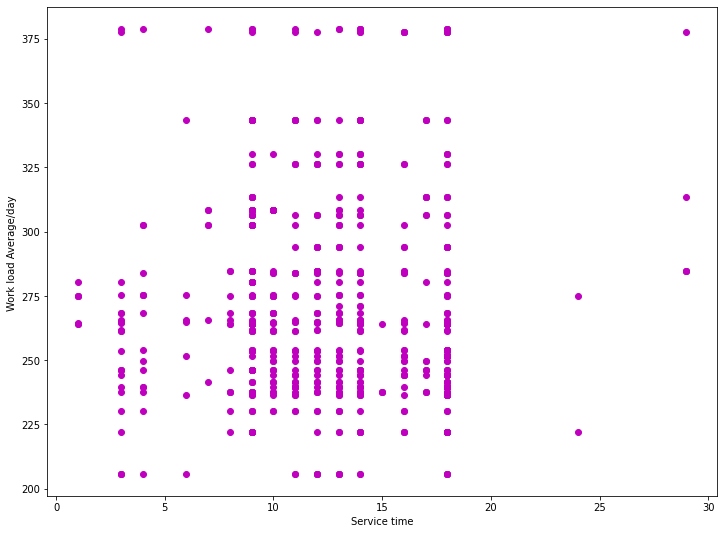

In [ ]:
plt.figure(figsize=(12,9))
plt.scatter(df["Service time"],df["Work load Average/day "] ,c='m')
plt.xlabel('Service time')
plt.ylabel('Work load Average/day ')
plt.show()

# conclusion:
Here we can see the there not much relation between experience and work load given to a employee.

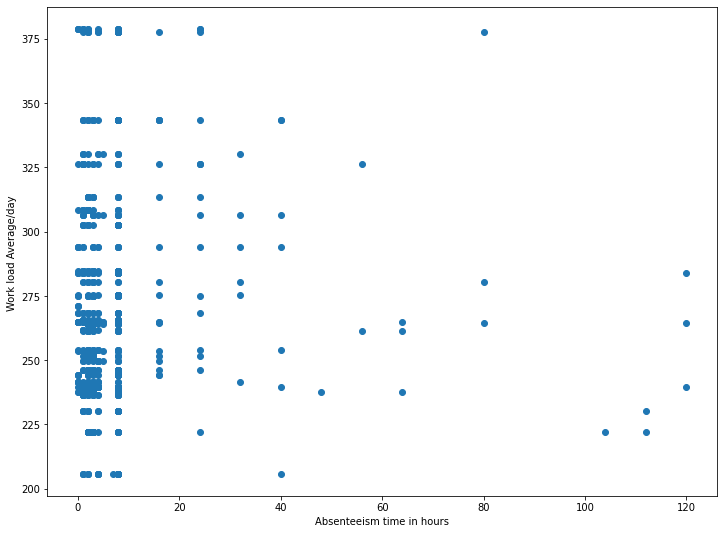

In [ ]:
plt.figure(figsize=(12,9))
plt.scatter(df["Absenteeism time in hours"],df["Work load Average/day "])
plt.xlabel('Absenteeism time in hours')
plt.ylabel('Work load Average/day ')
plt.show()

# conclusion:
Here we can see the there not much relation between Absenteeism time in hours and work load given to a employee.

# PCA Dimesion Reduction Method.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
pca=PCA(n_components=2) # pca1,pca2     which are perpendicular to each other.                        
df_r=pca.fit(df_scaled).transform(df_scaled)
explained_variance=pca.explained_variance_ratio_
explained_variance # gives percentage of info 

array([0.17207832, 0.11994758])

In [ ]:
df_r.shape

(740, 2)

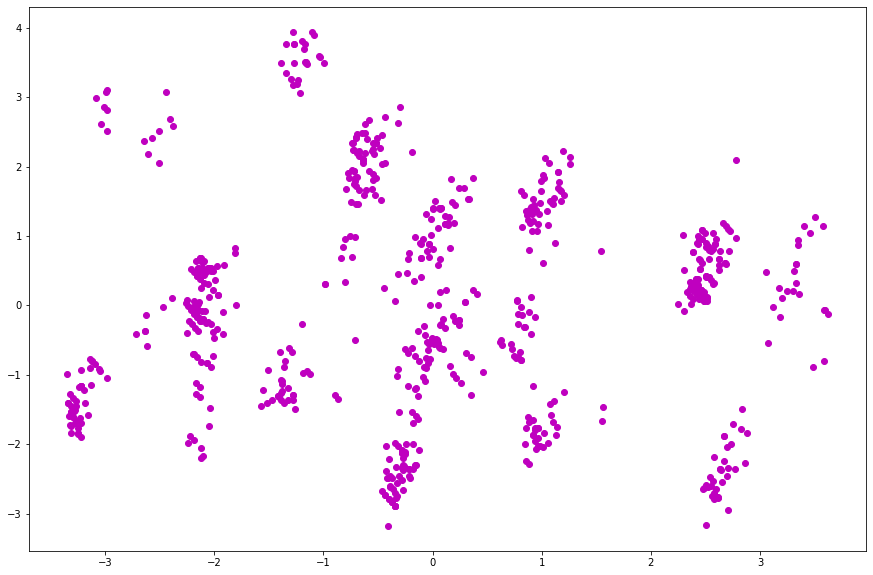

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(df_r[:,0],df_r[:,1],c='m')
plt.show()

In [ ]:
X1=df_scaled1.iloc[:,:-1]
y1=df_scaled1.iloc[:,-1]

In [ ]:
y1.value_counts()

2    441
1    175
0    124
Name: binned, dtype: int64

# LDA Dimesion Reduction Method.

In [ ]:
lda=LinearDiscriminantAnalysis(n_components=2) # n_compents=no of classes-1
X_r2=lda.fit(X1,y1).transform(X1)

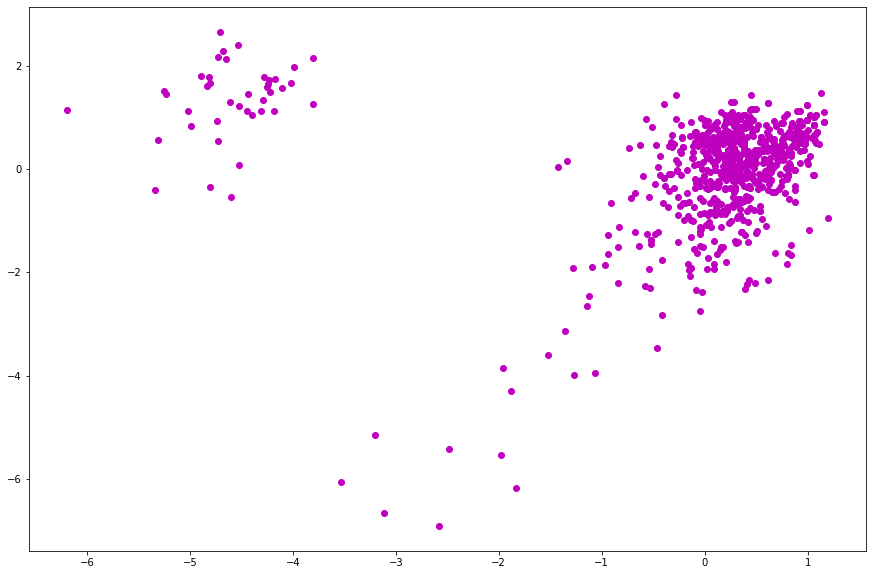

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(X_r2[:,0],X_r2[:,1],c='m')
plt.show()

# Conclusion if we see the cluster are more distint in KDA method compared to PCA so we can say KDA is best one but for checking will included both dimension reduction method.

# KMEANS

KMEANS on PCA reduced dimension

In [ ]:
DF1=pd.DataFrame(df_r)

In [ ]:
DF1

0         1
0    1.049896  1.362144
1    2.860596 -2.263585
2    2.505218  0.421235
3   -0.315553  0.453181
4    0.988942  1.470180
..        ...       ...
735  1.093072  1.478549
736 -0.063338 -0.905645
737  1.543295  0.783873
738  2.298027  1.012901
739  0.262393 -1.114016

[740 rows x 2 columns]

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib

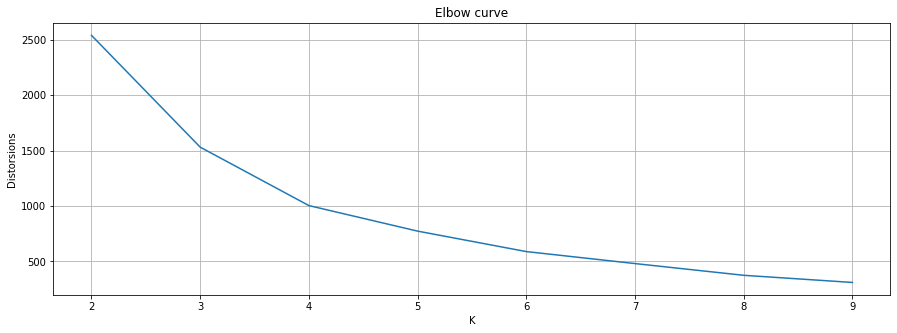

In [ ]:
distorsions = []    # distorsions= wcss 
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(DF1)
    distorsions.append(kmeans.inertia_) # kmeans.inertia gives wcss vaue that is distance

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve');

For n_clusters = 2 The average silhouette_score is : 0.38056809109257744
For n_clusters = 3 The average silhouette_score is : 0.43703801490757244
For n_clusters = 4 The average silhouette_score is : 0.49466115081433254
For n_clusters = 5 The average silhouette_score is : 0.49611565329890417
For n_clusters = 6 The average silhouette_score is : 0.5169087131469913
For n_clusters = 7 The average silhouette_score is : 0.5181616116747394
For n_clusters = 8 The average silhouette_score is : 0.5420057144238712
For n_clusters = 9 The average silhouette_score is : 0.5477741923733774
For n_clusters = 10 The average silhouette_score is : 0.5794467739027258


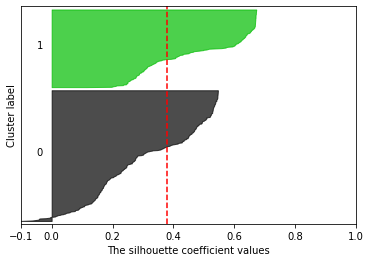

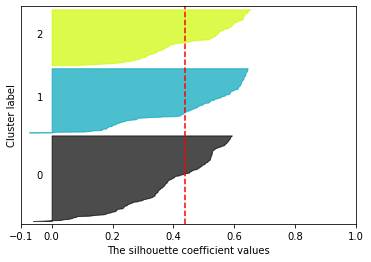

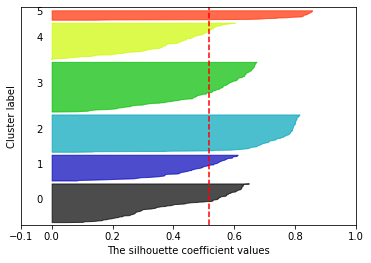

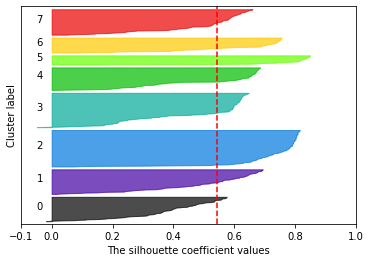

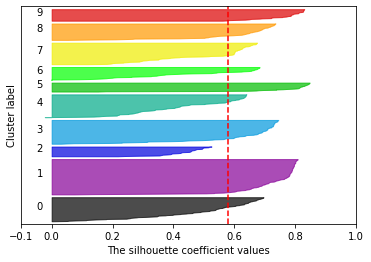

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(DF1) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(DF1)

    silhouette_avg = silhouette_score(DF1, cluster_labels)  # silhouette score is calculated 
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(DF1, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [ ]:
k_means=KMeans(n_clusters=10,random_state=42)
k_means.fit(DF1)
DF1['k_means.labels']=k_means.labels_
DF1['k_means.labels'].value_counts()

4    139
0     95
1     94
2     90
8     85
9     65
3     51
7     46
5     39
6     36
Name: k_means.labels, dtype: int64

Silhouette Coefficient: 0.766


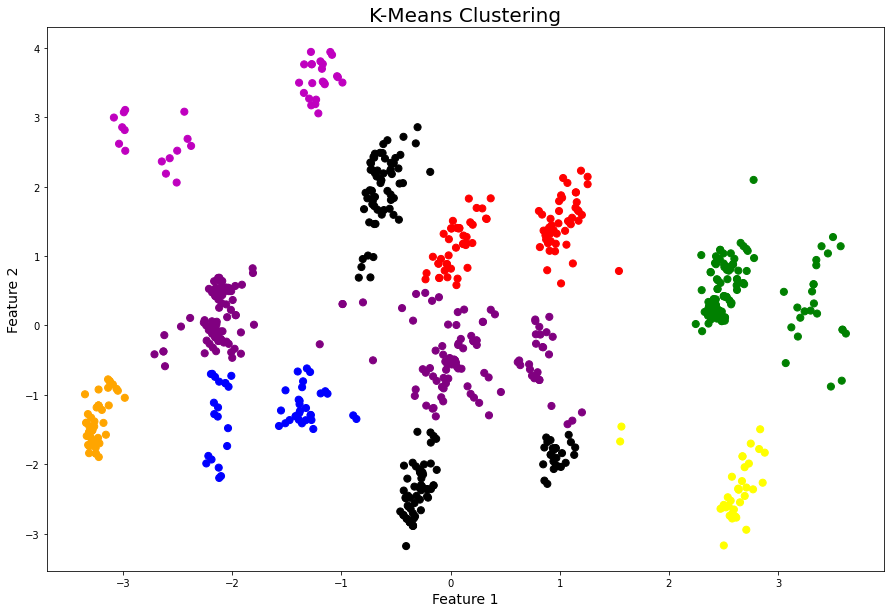

In [ ]:
plt.figure(figsize=(15,10))
colors=['purple','red','blue','green','m','yellow','orange','black']
plt.scatter(df_r[:,0],df_r[:,1],c=DF1['k_means.labels'],cmap=matplotlib.colors.ListedColormap(colors),s=50)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(DF1,DF1['k_means.labels']))
plt.show()

# KMEANS on LDA reduced dimension

In [ ]:
DF2=pd.DataFrame(X_r2)

In [ ]:
distorsions1 = []    
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(DF2)
    distorsions1.append(kmeans.inertia_) 

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions1)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions1')
plt.title('Elbow curve');

For n_clusters = 2 The average silhouette_score is : 0.7676552131374613
For n_clusters = 3 The average silhouette_score is : 0.6182210711306525
For n_clusters = 4 The average silhouette_score is : 0.535097030342952
For n_clusters = 5 The average silhouette_score is : 0.4166643538218726
For n_clusters = 6 The average silhouette_score is : 0.3933892153736299
For n_clusters = 7 The average silhouette_score is : 0.3764699809459755
For n_clusters = 8 The average silhouette_score is : 0.3854460548543263
For n_clusters = 9 The average silhouette_score is : 0.3603905237861954
For n_clusters = 10 The average silhouette_score is : 0.3778463444514939


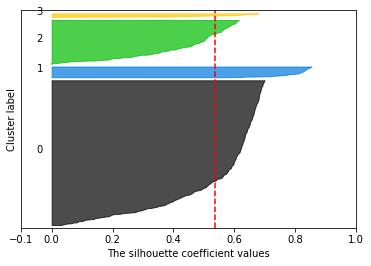

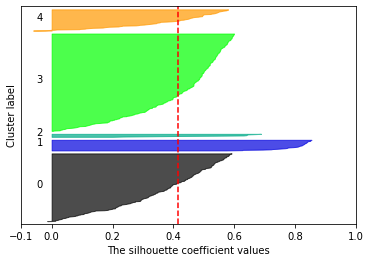

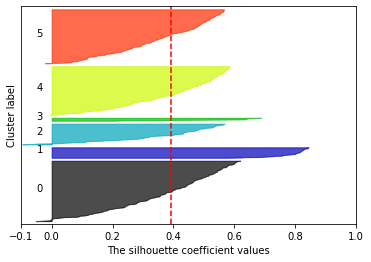

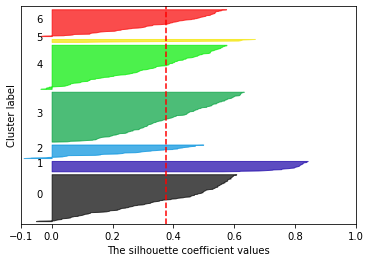

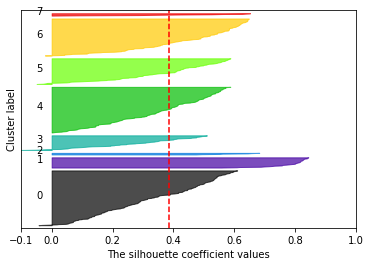

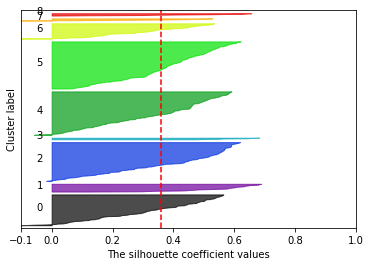

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_r2) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_r2)

    silhouette_avg = silhouette_score(X_r2, cluster_labels)  # silhouette score is calculated 
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_r2, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [ ]:
k_means=KMeans(n_clusters=2,random_state=42)
k_means.fit(DF1)
DF2['k_means.labels']=k_means.labels_
DF2['k_means.labels'].value_counts()


0    508
1    232
Name: k_means.labels, dtype: int64

Silhouette Coefficient: 0.241


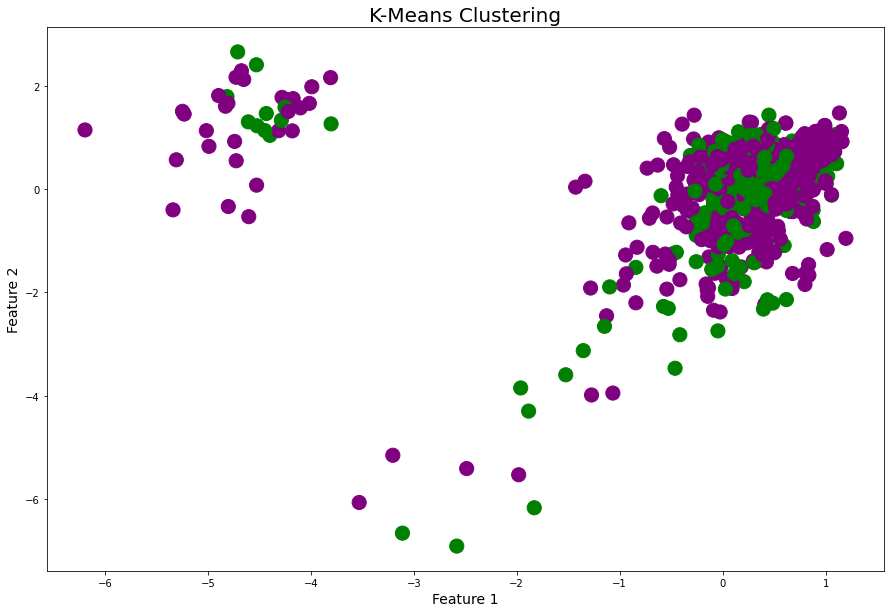

In [ ]:
plt.figure(figsize=(15,10))
colors=['purple','red','blue','green']
plt.scatter(X_r2[:,0],X_r2[:,1],c=DF2['k_means.labels'],cmap=matplotlib.colors.ListedColormap(colors),s=200)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(DF2,DF2['k_means.labels']))
plt.show()

# KMEANS for Original data df_scaled1

In [ ]:
df_scaled1


ID  Month of absence  Day of the week   Seasons  \
0   -0.637161          0.194191        -0.643947 -1.390175   
1    1.632719          0.194191        -0.643947 -1.390175   
2   -1.363523          0.194191         0.059924 -1.390175   
3   -1.000342          0.194191         0.763796 -1.390175   
4   -0.637161          0.194191         0.763796 -1.390175   
..        ...               ...              ...       ...   
735 -0.637161          0.194191        -0.643947 -1.390175   
736 -1.545113          0.194191        -0.643947 -1.390175   
737 -1.272728         -0.976491        -0.643947 -1.390175   
738 -0.909547         -0.976491         0.059924 -0.490149   
739  1.541923         -0.976491         1.467667  0.409877   

     Transportation expense  Distance from Residence to Work  Service time  \
0                  1.011408                         0.429556      0.101770   
1                 -1.544379                        -1.121694      1.242825   
2                 -0.632665                         1.441240      1.242825   
3                  0.861947                        -1.661258      0.329981   
4                  1.011408                         0.429556      0.101770   
..                      ...                              ...           ...   
735                1.011408                         0.429556      0.101770   
736                0.204318                        -1.256585      0.329981   
737               -1.544379                        -1.054248      0.101770   
738                0.144533                         0.362110      0.329981   
739               -0.632665                         1.036566      0.329981   

          Age  Work load Average/day   Hit target  ...  Education       Son  \
0   -0.532868               -0.818212    0.638686  ...  -0.433857  0.893723   
1    2.092860               -0.818212    0.638686  ...  -0.433857 -0.017234   
2    0.239405               -0.818212    0.638686  ...  -0.433857 -0.928191   
3    0.393859               -0.818212    0.638686  ...  -0.433857  0.893723   
4   -0.532868               -0.818212    0.638686  ...  -0.433857  0.893723   
..        ...                     ...         ...  ...        ...       ...   
735 -0.532868               -0.176427   -0.420423  ...  -0.433857  0.893723   
736  0.084950               -0.176427   -0.420423  ...   2.538869 -0.017234   
737  0.548314               -0.006949    0.109131  ...  -0.433857 -0.017234   
738  0.393859               -0.006949    0.109131  ...  -0.433857  0.893723   
739  2.556224               -0.006949    0.109131  ...  -0.433857 -0.017234   

     Social drinker  Social smoker       Pet    Weight    Height  \
0          0.872872      -0.280566  0.192850  0.851673 -0.019046   
1          0.872872      -0.280566 -0.566240  1.473056  0.975828   
2          0.872872      -0.280566 -0.566240  0.774000 -0.350671   
3          0.872872       3.564226 -0.566240 -0.857131 -0.682295   
4          0.872872      -0.280566  0.192850  0.851673 -0.019046   
..              ...            ...       ...       ...       ...   
735        0.872872      -0.280566  0.192850  0.851673 -0.019046   
736       -1.145644      -0.280566  0.192850  0.696327 -0.019046   
737        0.872872      -0.280566  5.506478  1.473056 -0.350671   
738        0.872872      -0.280566  0.951940  1.628402 -0.350671   
739       -1.145644      -0.280566  0.192850 -0.158075  0.478391   

     Body mass index  Absenteeism time in hours  binned  
0           0.775932                  -0.219511       2  
1           1.009438                  -0.519767       0  
2           1.009438                  -0.369639       2  
3          -0.625100                  -0.219511       0  
4           0.775932                  -0.369639       2  
..               ...                        ...     ...  
735         0.775932                   0.080744       1  
736         0.542427                  -0.219511       1  
737         1.709954                  -0.

In [ ]:
distorsions3 = []    # distorsions= wcss 
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    distorsions3.append(kmeans.inertia_) # kmeans.inertia gives wcss vaue that is distance

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions3)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions3')
plt.title('Elbow curve');

For n_clusters = 2 The average silhouette_score is : 0.24039434323440176
For n_clusters = 3 The average silhouette_score is : 0.17679909807089483
For n_clusters = 4 The average silhouette_score is : 0.20451802422913262
For n_clusters = 5 The average silhouette_score is : 0.21723207573259337
For n_clusters = 6 The average silhouette_score is : 0.24065343965451128
For n_clusters = 7 The average silhouette_score is : 0.26516271821411386
For n_clusters = 8 The average silhouette_score is : 0.2658243548020316
For n_clusters = 9 The average silhouette_score is : 0.30252809922301643
For n_clusters = 10 The average silhouette_score is : 0.2842878056011468


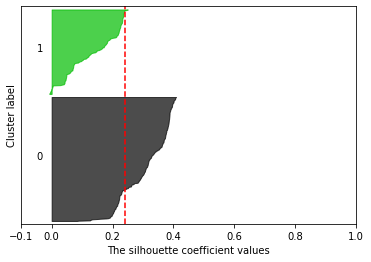

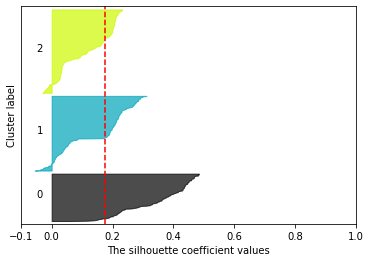

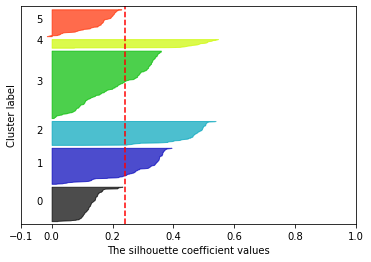

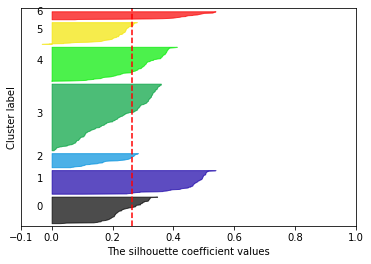

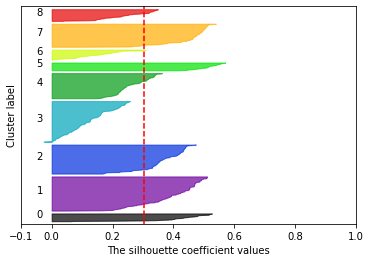

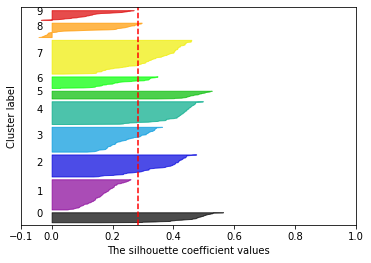

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df_scaled) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_scaled)

    silhouette_avg = silhouette_score(df_scaled, cluster_labels)  # silhouette score is calculated 
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [ ]:
k_means2=KMeans(n_clusters=9,random_state=42)
k_means2.fit(df_scaled)
df_scaled['k_means1.labels']=k_means2.labels_
df_scaled['k_means1.labels'].value_counts()

0    133
5    119
1    113
3     98
4     90
2     83
8     40
6     33
7     31
Name: k_means1.labels, dtype: int64

Silhouette Coefficient: 0.258


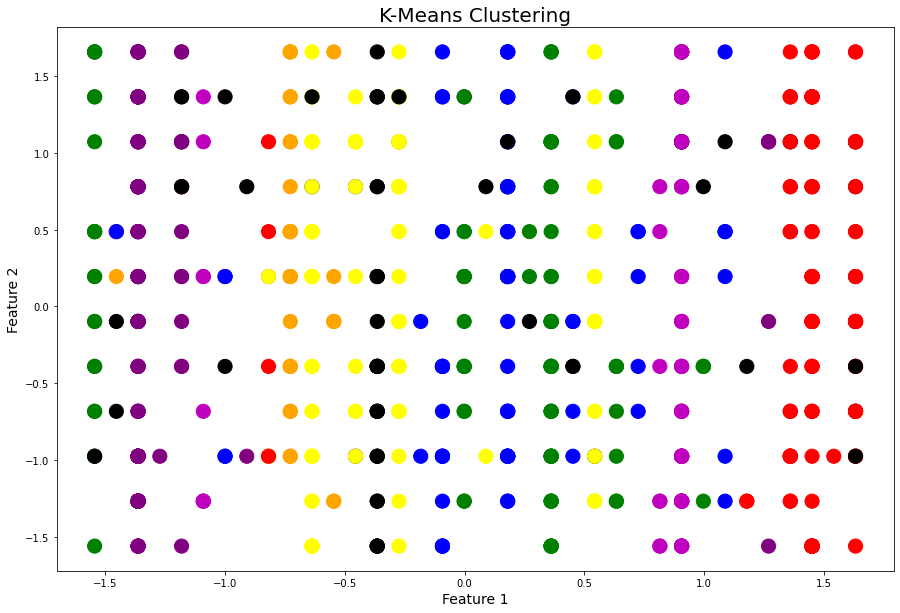

In [ ]:
plt.figure(figsize=(15,10))
colors=['purple','red','blue','green','m','yellow','orange','black']
plt.scatter(df_scaled.iloc[:,0],df_scaled.iloc[:,1],c=df_scaled['k_means1.labels'],cmap=matplotlib.colors.ListedColormap(colors),s=200,)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df_scaled,df_scaled['k_means1.labels']))
plt.show()

# Conclusion:
if we see knmeans was able to distinctinguish PCA reduced data properly compared to LDA and Original data.

# Hierarchial Agglomerative for PCA dataset.c

In [ ]:
import scipy.cluster.hierarchy as sch      # for making dendogram
from sklearn.cluster import AgglomerativeClustering

In [ ]:
DF3=pd.DataFrame(df_r)

In [ ]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(DF3, method = 'ward'),labels=DF3.index) # 
ax = plt.gca() # use to create current polar axis on current figure 
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title(' Dendrogram',fontsize=30)
plt.xlabel('feature 1',fontsize=20)
plt.ylabel('feature 2', fontsize=20)
plt.show()

In [ ]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(DF3, method = 'ward'),labels=DF3.index)
plt.axhline(y=30, color='r', linestyle='--') # for cutting the line 
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Dendrogram',fontsize=30)
plt.xlabel('feature 1',fontsize=20)
plt.ylabel('feature 2', fontsize=20)
plt.show()

In [ ]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(DF3)
y_hc
DF3['hc.labels']=hc.labels_
DF3['hc.labels'].value_counts()

1    209
0    205
2    187
3    139
Name: hc.labels, dtype: int64

Silhouette Coefficient: 0.578


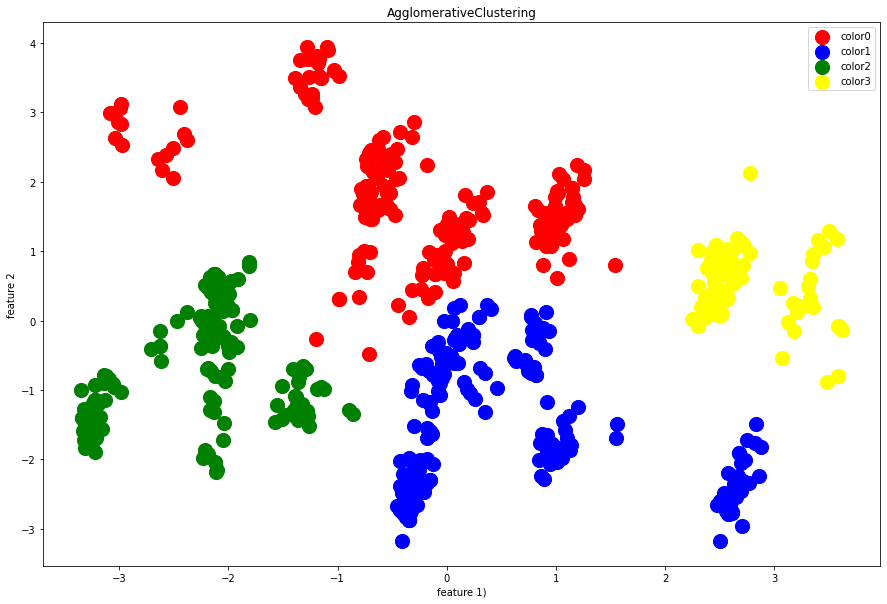

In [ ]:

plt.figure(figsize=(15,10))
plt.scatter(DF3.iloc[y_hc == 0, 0], DF3.iloc[y_hc == 0, 1], s = 200, c = 'red', label = 'color0')
plt.scatter(DF3.iloc[y_hc == 1, 0], DF3.iloc[y_hc == 1, 1], s = 200, c = 'blue', label = 'color1')
plt.scatter(DF3.iloc[y_hc == 2, 0], DF3.iloc[y_hc == 2, 1], s = 200, c = 'green', label = 'color2')
plt.scatter(DF3.iloc[y_hc == 3, 0], DF3.iloc[y_hc == 3, 1], s = 200, c = 'yellow', label = 'color3')
plt.title('AgglomerativeClustering')
plt.xlabel('feature 1)')
plt.ylabel('feature 2')
plt.legend()
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(DF3,DF3['hc.labels']))
plt.show()

# Hierarchial Agglomerative for LDA dataset.

In [ ]:
DF4=pd.DataFrame(X_r2)

In [ ]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(DF4, method = 'ward'),labels=DF4.index) # 
ax = plt.gca() # use to create current polar axis on current figure 
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title(' Dendrogram',fontsize=30)
plt.xlabel('feature 1',fontsize=20)
plt.ylabel('feature 2', fontsize=20)
plt.show()

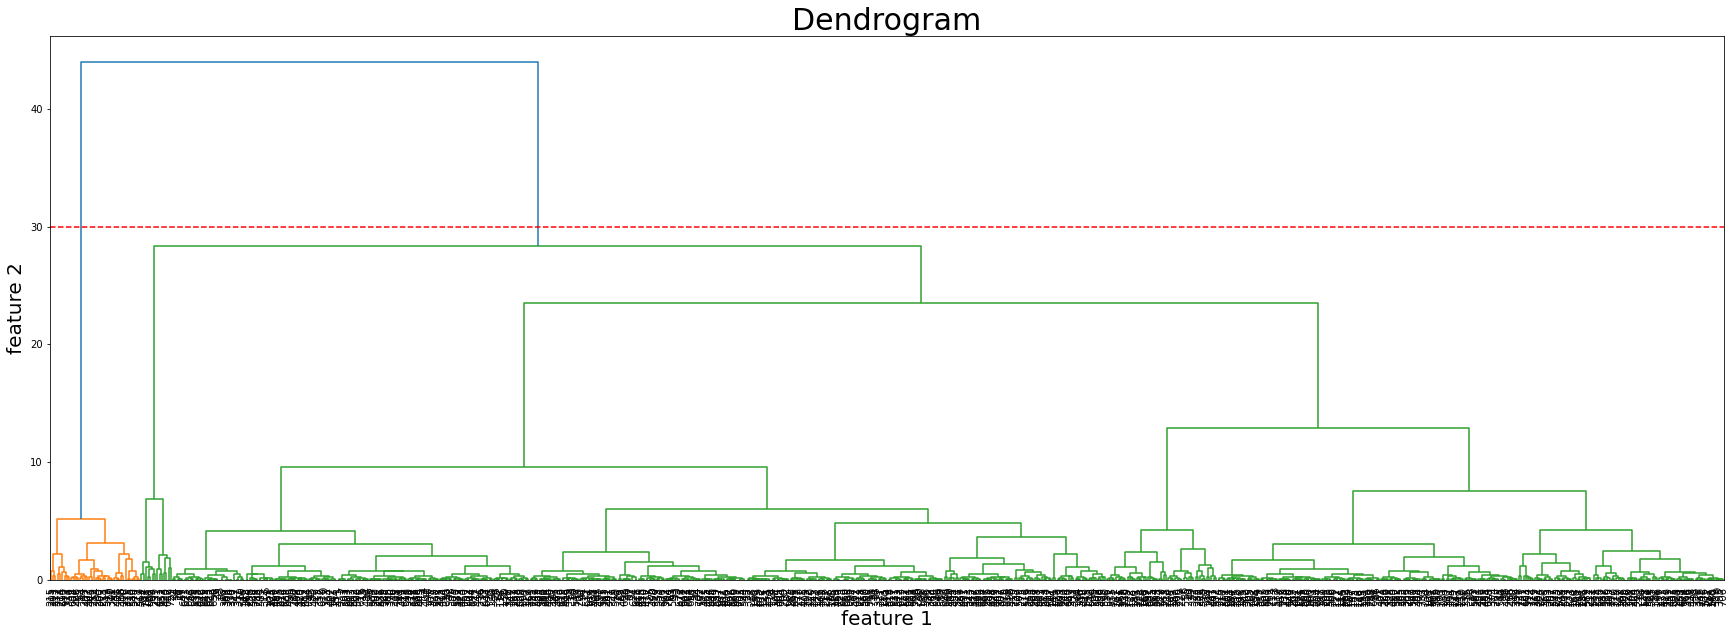

In [ ]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(DF4, method = 'ward'),labels=DF4.index)
plt.axhline(y=30, color='r', linestyle='--') # for cutting the line 
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Dendrogram',fontsize=30)
plt.xlabel('feature 1',fontsize=20)
plt.ylabel('feature 2', fontsize=20)
plt.show()

In [ ]:
hc1 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc1 = hc1.fit_predict(DF4)
y_hc1
DF4['hc.labels']=hc1.labels_
DF4['hc.labels'].value_counts()

0    700
1     40
Name: hc.labels, dtype: int64

Silhouette Coefficient: 0.772


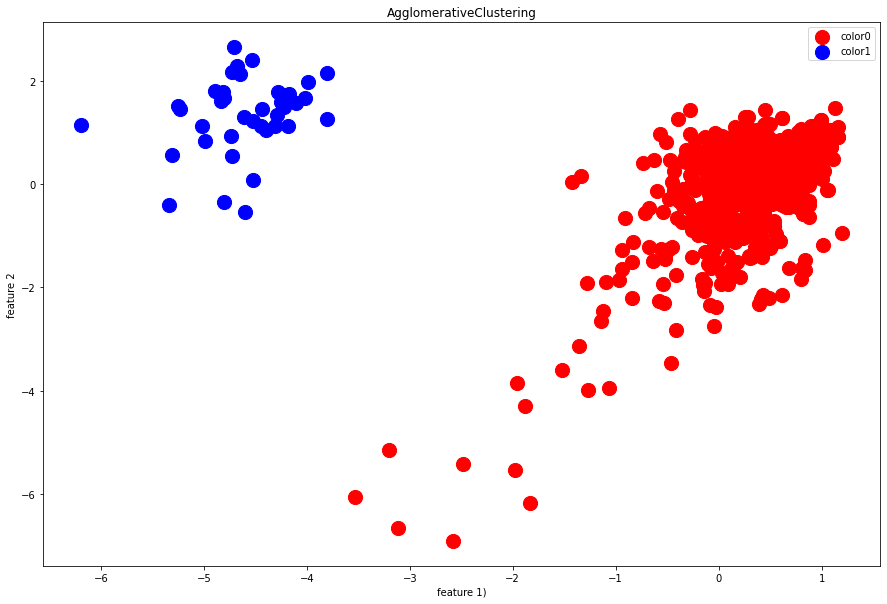

In [ ]:

plt.figure(figsize=(15,10))
plt.scatter(DF4.iloc[y_hc1 == 0, 0], DF4.iloc[y_hc1 == 0, 1], s = 200, c = 'red', label = 'color0')
plt.scatter(DF4.iloc[y_hc1 == 1, 0], DF4.iloc[y_hc1 == 1, 1], s = 200, c = 'blue', label = 'color1')
plt.title('AgglomerativeClustering')
plt.xlabel('feature 1)')
plt.ylabel('feature 2')
plt.legend()
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(DF4,DF4['hc.labels']))
plt.show()

# Hierarchial Agglomerative for original dataset.

In [ ]:
df_scaled

ID  Month of absence  Day of the week   Seasons  \
0   -0.637161          0.194191        -0.643947 -1.390175   
1    1.632719          0.194191        -0.643947 -1.390175   
2   -1.363523          0.194191         0.059924 -1.390175   
3   -1.000342          0.194191         0.763796 -1.390175   
4   -0.637161          0.194191         0.763796 -1.390175   
..        ...               ...              ...       ...   
735 -0.637161          0.194191        -0.643947 -1.390175   
736 -1.545113          0.194191        -0.643947 -1.390175   
737 -1.272728         -0.976491        -0.643947 -1.390175   
738 -0.909547         -0.976491         0.059924 -0.490149   
739  1.541923         -0.976491         1.467667  0.409877   

     Transportation expense  Distance from Residence to Work  Service time  \
0                  1.011408                         0.429556      0.101770   
1                 -1.544379                        -1.121694      1.242825   
2                 -0.632665                         1.441240      1.242825   
3                  0.861947                        -1.661258      0.329981   
4                  1.011408                         0.429556      0.101770   
..                      ...                              ...           ...   
735                1.011408                         0.429556      0.101770   
736                0.204318                        -1.256585      0.329981   
737               -1.544379                        -1.054248      0.101770   
738                0.144533                         0.362110      0.329981   
739               -0.632665                         1.036566      0.329981   

          Age  Work load Average/day   Hit target  ...  Social drinker  \
0   -0.532868               -0.818212    0.638686  ...        0.872872   
1    2.092860               -0.818212    0.638686  ...        0.872872   
2    0.239405               -0.818212    0.638686  ...        0.872872   
3    0.393859               -0.818212    0.638686  ...        0.872872   
4   -0.532868               -0.818212    0.638686  ...        0.872872   
..        ...                     ...         ...  ...             ...   
735 -0.532868               -0.176427   -0.420423  ...        0.872872   
736  0.084950               -0.176427   -0.420423  ...       -1.145644   
737  0.548314               -0.006949    0.109131  ...        0.872872   
738  0.393859               -0.006949    0.109131  ...        0.872872   
739  2.556224               -0.006949    0.109131  ...       -1.145644   

     Social smoker       Pet    Weight    Height  Body mass index  \
0        -0.280566  0.192850  0.851673 -0.019046         0.775932   
1        -0.280566 -0.566240  1.473056  0.975828         1.009438   
2        -0.280566 -0.566240  0.774000 -0.350671         1.009438   
3         3.564226 -0.566240 -0.857131 -0.682295        -0.625100   
4        -0.280566  0.192850  0.851673 -0.019046         0.775932   
..             ...       ...       ...       ...              ...   
735      -0.280566  0.192850  0.851673 -0.019046         0.775932   
736      -0.280566  0.192850  0.696327 -0.019046         0.542427   
737      -0.280566  5.506478  1.473056 -0.350671         1.709954   
738      -0.280566  0.951940  1.628402 -0.350671         1.943459   
739      -0.280566  0.192850 -0.158075  0.478391        -0.391595   

     Absenteeism time in hours  k_means1.labels  hc.labels  DBSCAN_opt_labels  
0                    -0.219511                3          2                  0  
1                    -0.519767                5          0                 -1  
2                    -0.369639                2          4                  0  
3                    -0.219511                7          5                  4  
4                    -0.369639                3          2                  0  
..                         ...              ...        ...                ...  
735                   0.080744                3    

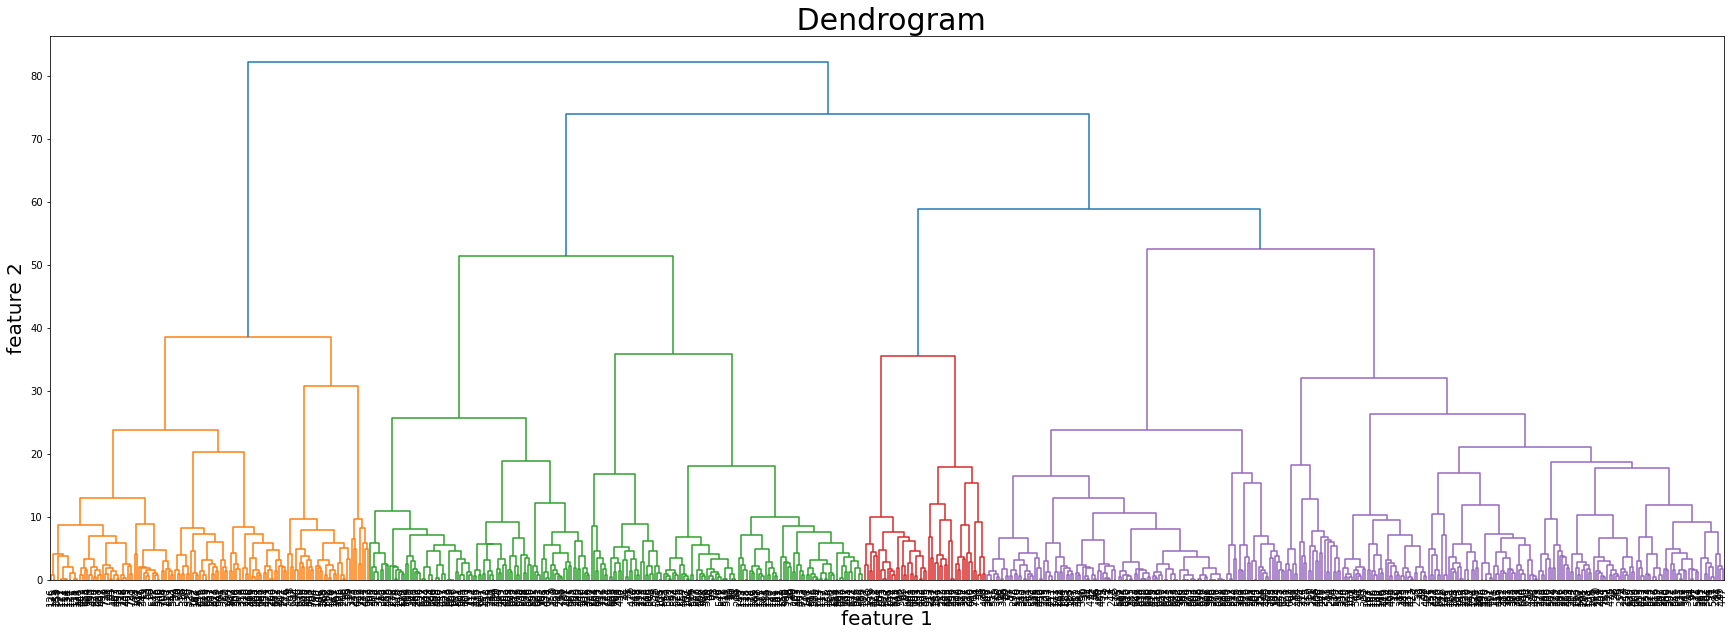

In [ ]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(df_scaled, method = 'ward'),labels=df_scaled.index) # 
ax = plt.gca() # use to create current polar axis on current figure 
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title(' Dendrogram',fontsize=30)
plt.xlabel('feature 1',fontsize=20)
plt.ylabel('feature 2', fontsize=20)
plt.show()

In [ ]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(df_scaled, method = 'ward'),labels=df_scaled.index)
plt.axhline(y=40, color='r', linestyle='--') # for cutting the line 
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Dendrogram',fontsize=30)
plt.xlabel('feature 1',fontsize=20)
plt.ylabel('feature 2', fontsize=20)
plt.show()

In [ ]:
hc2 = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')
y_hc2 = hc2.fit_predict(df_scaled)
y_hc2
df_scaled['hc.labels']=hc2.labels_
df_scaled['hc.labels'].value_counts()

2    194
0    141
4    132
1    121
5     98
3     54
Name: hc.labels, dtype: int64

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(df_scaled.iloc[y_hc2 == 0, 0], df_scaled.iloc[y_hc2 == 0, 1], s = 200, c = 'red', label = 'color0')
plt.scatter(df_scaled.iloc[y_hc2 == 1, 0], df_scaled.iloc[y_hc2 == 1, 1], s = 200, c = 'blue', label = 'color1')
plt.scatter(df_scaled.iloc[y_hc2 == 2, 0], df_scaled.iloc[y_hc2 == 2, 1], s = 200, c = 'orange', label = 'color2')
plt.scatter(df_scaled.iloc[y_hc2 == 3, 0], df_scaled.iloc[y_hc2 == 3, 1], s = 200, c = 'm', label = 'color3')
plt.scatter(df_scaled.iloc[y_hc2 == 4, 0], df_scaled.iloc[y_hc2 == 4, 1], s = 200, c = 'y', label = 'color4')
plt.scatter(df_scaled.iloc[y_hc2 == 5, 0], df_scaled.iloc[y_hc2 == 5, 1], s = 200, c = 'g', label = 'color5')
plt.title('AgglomerativeClustering')
plt.xlabel('feature 1)')
plt.ylabel('feature 2')
plt.legend()
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df_scaled,df_scaled['hc.labels']))
plt.show()

Silhouette Coefficient: 0.275


# Conclusion
Here if we see alggomerative clustering was able distinguish between LDA reduced data set compared original and PCA data set

# DBSCAN for PCA dataset

In [ ]:
DF5=pd.DataFrame(df_r)

In [ ]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(DF5)
distances, indices = nbrs.kneighbors(DF5)

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)

In [ ]:
nbrs = neigh.fit(DF5)
distances1, indices = nbrs.kneighbors(DF5)

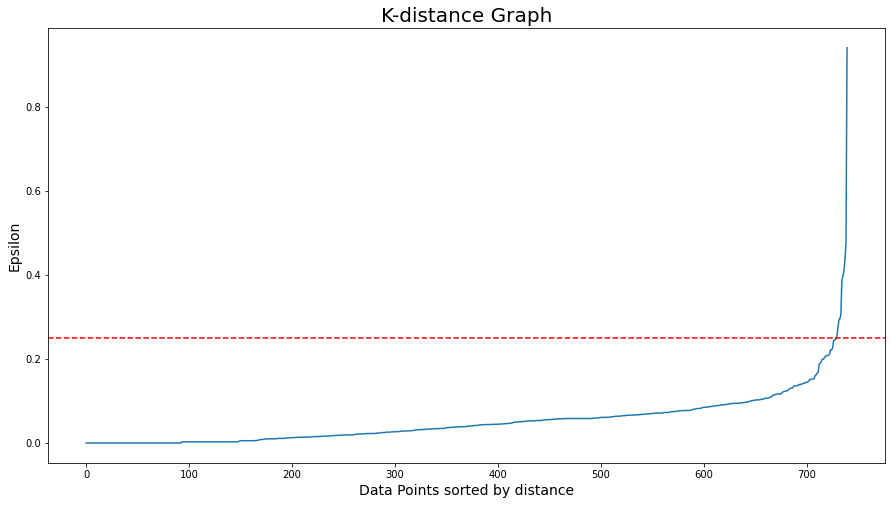

In [ ]:
distances1 = np.sort(distances1, axis=0)
distances1 = distances1[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances1)
plt.axhline(y=0.25, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [ ]:
eps=0.25
for min_samples in [10, 11, 12, 13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,]:
 clusterer = DBSCAN(eps=eps, min_samples=min_samples)
 cluster_labels = clusterer.fit_predict(DF5)
 DF5['DBSCAN_opt_labels']=clusterer.labels_ 
 x= cluster_labels +2
 y = np.bincount(x) # gives how many  samples in each cluster 
 ii = np.nonzero(y)[0] # minsamples where cluster is getting the same snd take lowest number
 results = list(zip(ii,y[ii]) )
 print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', len(results))
 print("Silhouette Coefficient: %0.3f" , metrics.silhouette_score(DF5, DF5['DBSCAN_opt_labels']))

eps= 0.25 | min_samples=  10 | obtained clustering:  15
Silhouette Coefficient: %0.3f 0.65995419012551
eps= 0.25 | min_samples=  11 | obtained clustering:  15
Silhouette Coefficient: %0.3f 0.6657965744058383
eps= 0.25 | min_samples=  12 | obtained clustering:  14
Silhouette Coefficient: %0.3f 0.6366982514533157
eps= 0.25 | min_samples=  13 | obtained clustering:  13
Silhouette Coefficient: %0.3f 0.6179139389159659
eps= 0.25 | min_samples=  14 | obtained clustering:  13
Silhouette Coefficient: %0.3f 0.6170183350311486
eps= 0.25 | min_samples=  15 | obtained clustering:  13
Silhouette Coefficient: %0.3f 0.6066198815490266
eps= 0.25 | min_samples=  16 | obtained clustering:  14
Silhouette Coefficient: %0.3f 0.5973532569834074
eps= 0.25 | min_samples=  17 | obtained clustering:  12
Silhouette Coefficient: %0.3f 0.539996694497159
eps= 0.25 | min_samples=  18 | obtained clustering:  12
Silhouette Coefficient: %0.3f 0.536597290692934
eps= 0.25 | min_samples=  19 | obtained clustering:  12
Sil

In [ ]:
dbscan_opt=DBSCAN(eps=0.25,min_samples=20)
dbscan_opt.fit(DF5)


DBSCAN(eps=0.25, min_samples=20)

Silhouette Coefficient: 0.274


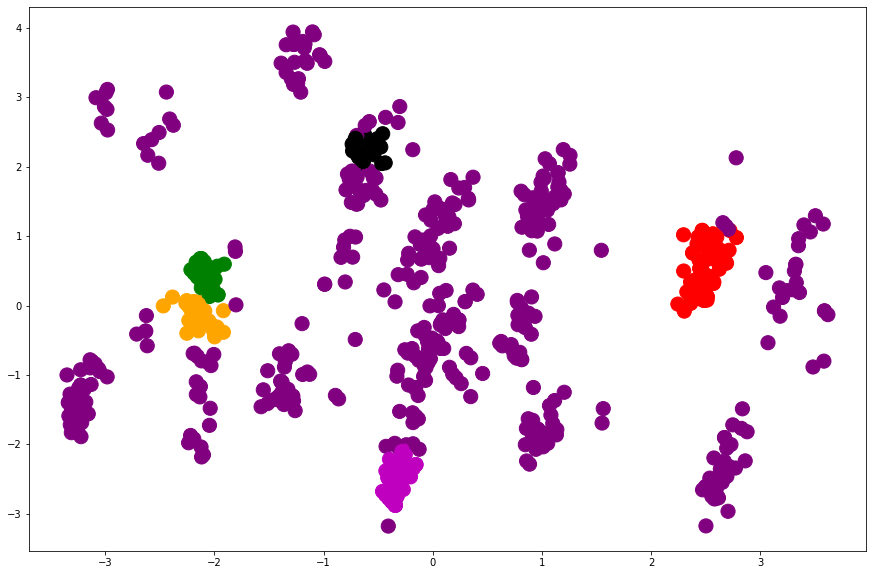

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(DF5[0], DF5[1], c=DF5['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=200)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(DF5, DF5['DBSCAN_opt_labels']))

# DBSCAN for LDA dataset

In [ ]:
DF6=pd.DataFrame(X_r2)

In [ ]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(DF6)
distances2, indices = nbrs.kneighbors(DF6)

In [ ]:
distances2 = np.sort(distances2, axis=0)
distances2 = distances2[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances2)

In [ ]:
nbrs = neigh.fit(DF6)
distances3, indices = nbrs.kneighbors(DF6)

In [ ]:
distances3 = np.sort(distances3, axis=0)
distances3 = distances3[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances3)
plt.axhline(y=0.4, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [ ]:
eps=0.4
for min_samples in [10, 11, 12, 13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,]:
 clusterer = DBSCAN(eps=eps, min_samples=min_samples)
 cluster_labels = clusterer.fit_predict(DF6)
 DF6['DBSCAN_opt_labels']=clusterer.labels_ 
 x= cluster_labels +2
 y = np.bincount(x) # gives how many  samples in each cluster 
 ii = np.nonzero(y)[0] # minsamples where cluster is getting the same snd take lowest number
 results = list(zip(ii,y[ii]) )
 print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', len(results))
 print("Silhouette Coefficient: %0.3f" , metrics.silhouette_score(DF6, DF6['DBSCAN_opt_labels']))

eps= 0.4 | min_samples=  10 | obtained clustering:  3
Silhouette Coefficient: %0.3f 0.6908623720011936
eps= 0.4 | min_samples=  11 | obtained clustering:  3
Silhouette Coefficient: %0.3f 0.6895015282587287
eps= 0.4 | min_samples=  12 | obtained clustering:  3
Silhouette Coefficient: %0.3f 0.686726328585139
eps= 0.4 | min_samples=  13 | obtained clustering:  3
Silhouette Coefficient: %0.3f 0.685158682941433
eps= 0.4 | min_samples=  14 | obtained clustering:  2
Silhouette Coefficient: %0.3f 0.6979294648350293
eps= 0.4 | min_samples=  15 | obtained clustering:  2
Silhouette Coefficient: %0.3f 0.6923741872968231
eps= 0.4 | min_samples=  16 | obtained clustering:  2
Silhouette Coefficient: %0.3f 0.6923741872968231
eps= 0.4 | min_samples=  17 | obtained clustering:  2
Silhouette Coefficient: %0.3f 0.6910003887167073
eps= 0.4 | min_samples=  18 | obtained clustering:  2
Silhouette Coefficient: %0.3f 0.6887711724922
eps= 0.4 | min_samples=  19 | obtained clustering:  2
Silhouette Coefficient: 

In [ ]:
dbscan_opt=DBSCAN(eps=0.4,min_samples=14)
dbscan_opt.fit(DF6)


DBSCAN(eps=0.4, min_samples=14)

In [ ]:
DF6['DBSCAN_opt_labels']=dbscan_opt.labels_
DF6['DBSCAN_opt_labels'].value_counts()

 0    637
-1    103
Name: DBSCAN_opt_labels, dtype: int64

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(DF6[0], DF6[1], c=DF6['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=200)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(DF6, DF6['DBSCAN_opt_labels']))

Silhouette Coefficient: 0.664


# DBSCAN for Original dataset

In [ ]:
nbrs = neigh.fit(df_scaled)
distances4, indices = nbrs.kneighbors(df_scaled)

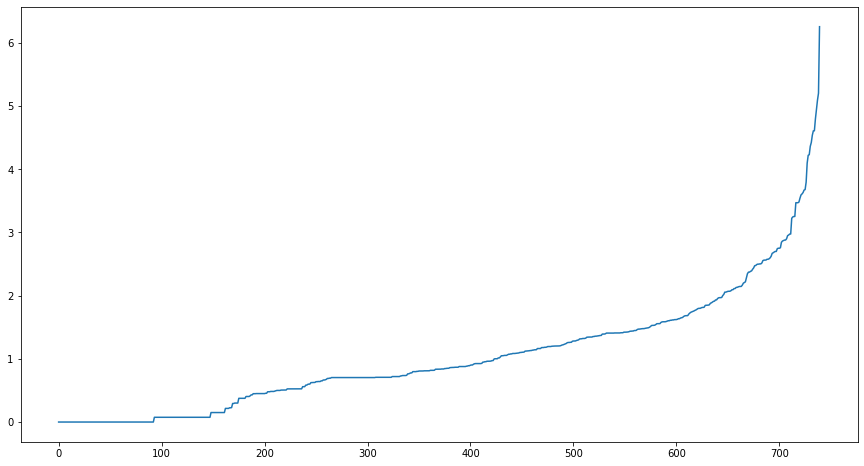

In [ ]:
distances4 = np.sort(distances4, axis=0)
distances4 = distances4[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances4)

In [ ]:
distances5, indices = nbrs.kneighbors(df_scaled)

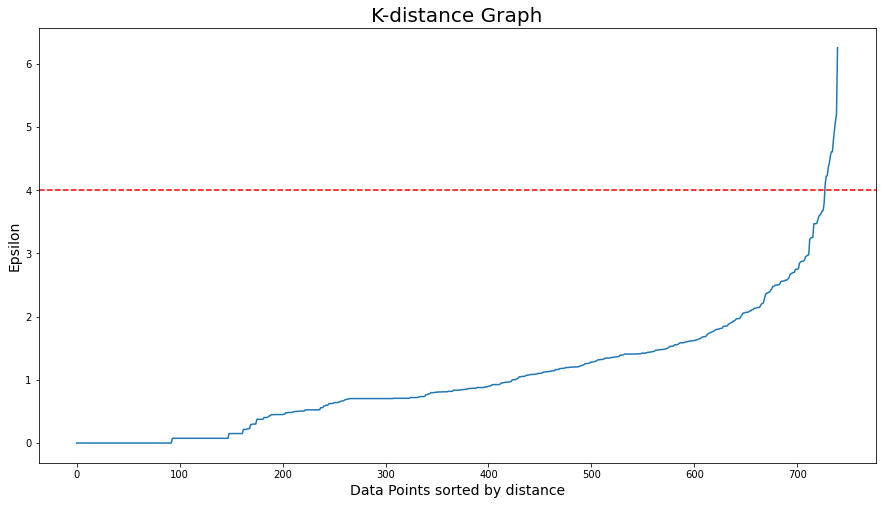

In [ ]:
distances5 = np.sort(distances5, axis=0)
distances5 = distances5[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances5)
plt.axhline(y=4, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [ ]:
eps=4
for min_samples in [10, 11, 12, 13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,]:
 clusterer = DBSCAN(eps=eps, min_samples=min_samples)
 cluster_labels = clusterer.fit_predict(df_scaled)
 df_scaled['DBSCAN_opt_labels']=clusterer.labels_ 
 x= cluster_labels +2
 y = np.bincount(x) # gives how many  samples in each cluster 
 ii = np.nonzero(y)[0] # minsamples where cluster is getting the same snd take lowest number
 results = list(zip(ii,y[ii]) )
 print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', len(results))
 print("Silhouette Coefficient: %0.3f" , metrics.silhouette_score(df_scaled, df_scaled['DBSCAN_opt_labels']))

eps= 4 | min_samples=  10 | obtained clustering:  6
Silhouette Coefficient: %0.3f 0.2219891274012504
eps= 4 | min_samples=  11 | obtained clustering:  6
Silhouette Coefficient: %0.3f 0.2219891274012504
eps= 4 | min_samples=  12 | obtained clustering:  6
Silhouette Coefficient: %0.3f 0.24139169003192915
eps= 4 | min_samples=  13 | obtained clustering:  6
Silhouette Coefficient: %0.3f 0.24139169003192915
eps= 4 | min_samples=  14 | obtained clustering:  6
Silhouette Coefficient: %0.3f 0.24139169003192915
eps= 4 | min_samples=  15 | obtained clustering:  6
Silhouette Coefficient: %0.3f 0.24139169003192915
eps= 4 | min_samples=  16 | obtained clustering:  6
Silhouette Coefficient: %0.3f 0.22306372047771497
eps= 4 | min_samples=  17 | obtained clustering:  6
Silhouette Coefficient: %0.3f 0.22306372047771497
eps= 4 | min_samples=  18 | obtained clustering:  6
Silhouette Coefficient: %0.3f 0.22306372047771497
eps= 4 | min_samples=  19 | obtained clustering:  6
Silhouette Coefficient: %0.3f 0.

In [ ]:
dbscan_opt=DBSCAN(eps=4,min_samples=12)
dbscan_opt.fit(df_scaled)


DBSCAN(eps=4, min_samples=12)

In [ ]:
df_scaled['DBSCAN_opt_labels']=dbscan_opt.labels_
df_scaled['DBSCAN_opt_labels'].value_counts()

 0    375
 3    193
-1     92
 4     28
 2     28
 1     24
Name: DBSCAN_opt_labels, dtype: int64

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(df_scaled.iloc[:,0], df_scaled.iloc[:,1], c=df_scaled['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=200)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df_scaled, df_scaled['DBSCAN_opt_labels']))

Silhouette Coefficient: 0.180


# Conclusion:
Dbscan was able to distinguish LDA dimensional reduced data set more correctly then original and PCA reduced dataset.

In [ ]:
print("Silhouette Coefficient for k means PCA: %0.3f" % metrics.silhouette_score(DF1,DF1['k_means.labels']))
print("Silhouette Coefficient for  AGGLOMERATIVE PCA : %0.3f" % metrics.silhouette_score(DF3,DF3['hc.labels']))
print("Silhouette Coefficient for DBSCAN PCA: %0.3f" % metrics.silhouette_score(DF5, DF5['DBSCAN_opt_labels']))
print('----------------------------------------------------------')

print("Silhouette Coefficient for k means LDA: %0.3f" % metrics.silhouette_score(DF2,DF2['k_means.labels']))
print("Silhouette Coefficient for  AGGLOMERATIVE LDA : %0.3f" % metrics.silhouette_score(DF4,DF4['hc.labels']))
print("Silhouette Coefficient for DBSCAN LDA: %0.3f" % metrics.silhouette_score(DF6, DF6['DBSCAN_opt_labels']))
print('----------------------------------------------------------')

print("Silhouette Coefficient for k means original data: %0.3f" % metrics.silhouette_score(df_scaled,df_scaled['k_means1.labels']))
print("Silhouette Coefficient for  AGGLOMERATIVE original data : %0.3f" % metrics.silhouette_score(df_scaled,df_scaled['hc.labels']))
print("Silhouette Coefficient for DBSCAN original data: %0.3f" % metrics.silhouette_score(df_scaled, df_scaled['DBSCAN_opt_labels']))

Silhouette Coefficient for k means PCA: 0.693
Silhouette Coefficient for  AGGLOMERATIVE PCA : 0.578
Silhouette Coefficient for DBSCAN PCA: 0.274
----------------------------------------------------------
Silhouette Coefficient for k means LDA: 0.238
Silhouette Coefficient for  AGGLOMERATIVE LDA : 0.772
Silhouette Coefficient for DBSCAN LDA: 0.664
----------------------------------------------------------
Silhouette Coefficient for k means original data: 0.302
Silhouette Coefficient for  AGGLOMERATIVE original data : 0.267
Silhouette Coefficient for DBSCAN original data: 0.180


# Final Conclsuion:
For PCA

1.if we see knmeans was able to distinctinguish PCA reduced agglomerative and DBSCAN

FOR LDA

2.Here if we see alggomerative clustering was able distinguish between LDA reduced data set compared kMEANS and DBSCAN

FOR Original Data

3.Here if we Kmeans was able distinguish in original data compared to DBSCAN and agglomerative  clustterng

Finally we can say kmeans is able perform well in general.

# To check on what basiscs cluster are formed.

In [ ]:
df['Cluster']= k_means2.labels_

In [ ]:
df.drop('k_means1.labels',axis=1 ,inplace=True)

In [ ]:
df

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0    11                  26                 7                3        1   
1    36                   0                 7                3        1   
2     3                  23                 7                4        1   
3     7                   7                 7                5        1   
4    11                  23                 7                5        1   
..   ..                 ...               ...              ...      ...   
735  11                  14                 7                3        1   
736   1                  11                 7                3        1   
737   4                   0                 3                3        1   
738   8                   0                 3                4        2   
739  35                   0                 3                6        3   

     Transportation expense  Distance from Residence to Work  Service time  \
0                       289                               36            13   
1                       118                               13            18   
2                       179                               51            18   
3                       279                                5            14   
4                       289                               36            13   
..                      ...                              ...           ...   
735                     289                               36            13   
736                     235                               11            14   
737                     118                               14            13   
738                     231                               35            14   
739                     179                               45            14   

     Age  Work load Average/day   ...  Son  Social drinker  Social smoker  \
0     33                 239.554  ...    2               1              0   
1     50                 239.554  ...    1               1              0   
2     38                 239.554  ...    0               1              0   
3     39                 239.554  ...    2               1              1   
4     33                 239.554  ...    2               1              0   
..   ...                     ...  ...  ...             ...            ...   
735   33                 264.604  ...    2               1              0   
736   37                 264.604  ...    1               0              0   
737   40                 271.219  ...    1               1              0   
738   39                 271.219  ...    2               1              0   
739   53                 271.219  ...    1               0              0   

     Pet  Weight  Height  Body mass index  Absenteeism time in hours  binned  \
0      1      90     172               30                          4       2   
1      0      98     178               31                          0       0   
2      0      89     170               31                          2       2   
3      0      68     168               24                          4       0   
4      1      90     172               30                          2       2   
..   ...     ...     ...              ...                        ...     ...   
735    1      90     172               30                          8       1   
736    1      88     172               29                          4       1   
737    8      98     170               34                          0       0   
738    2     100     170               35                          0       0   
739    1      77     175               25                          0       0   

     Cluster  
0          5  
1          6  
2          0  
3          7  
4          5  
..       ...  
735        5  
736        2  
737        1  
738        0  
739        6  

[740 rows x 23 columns]

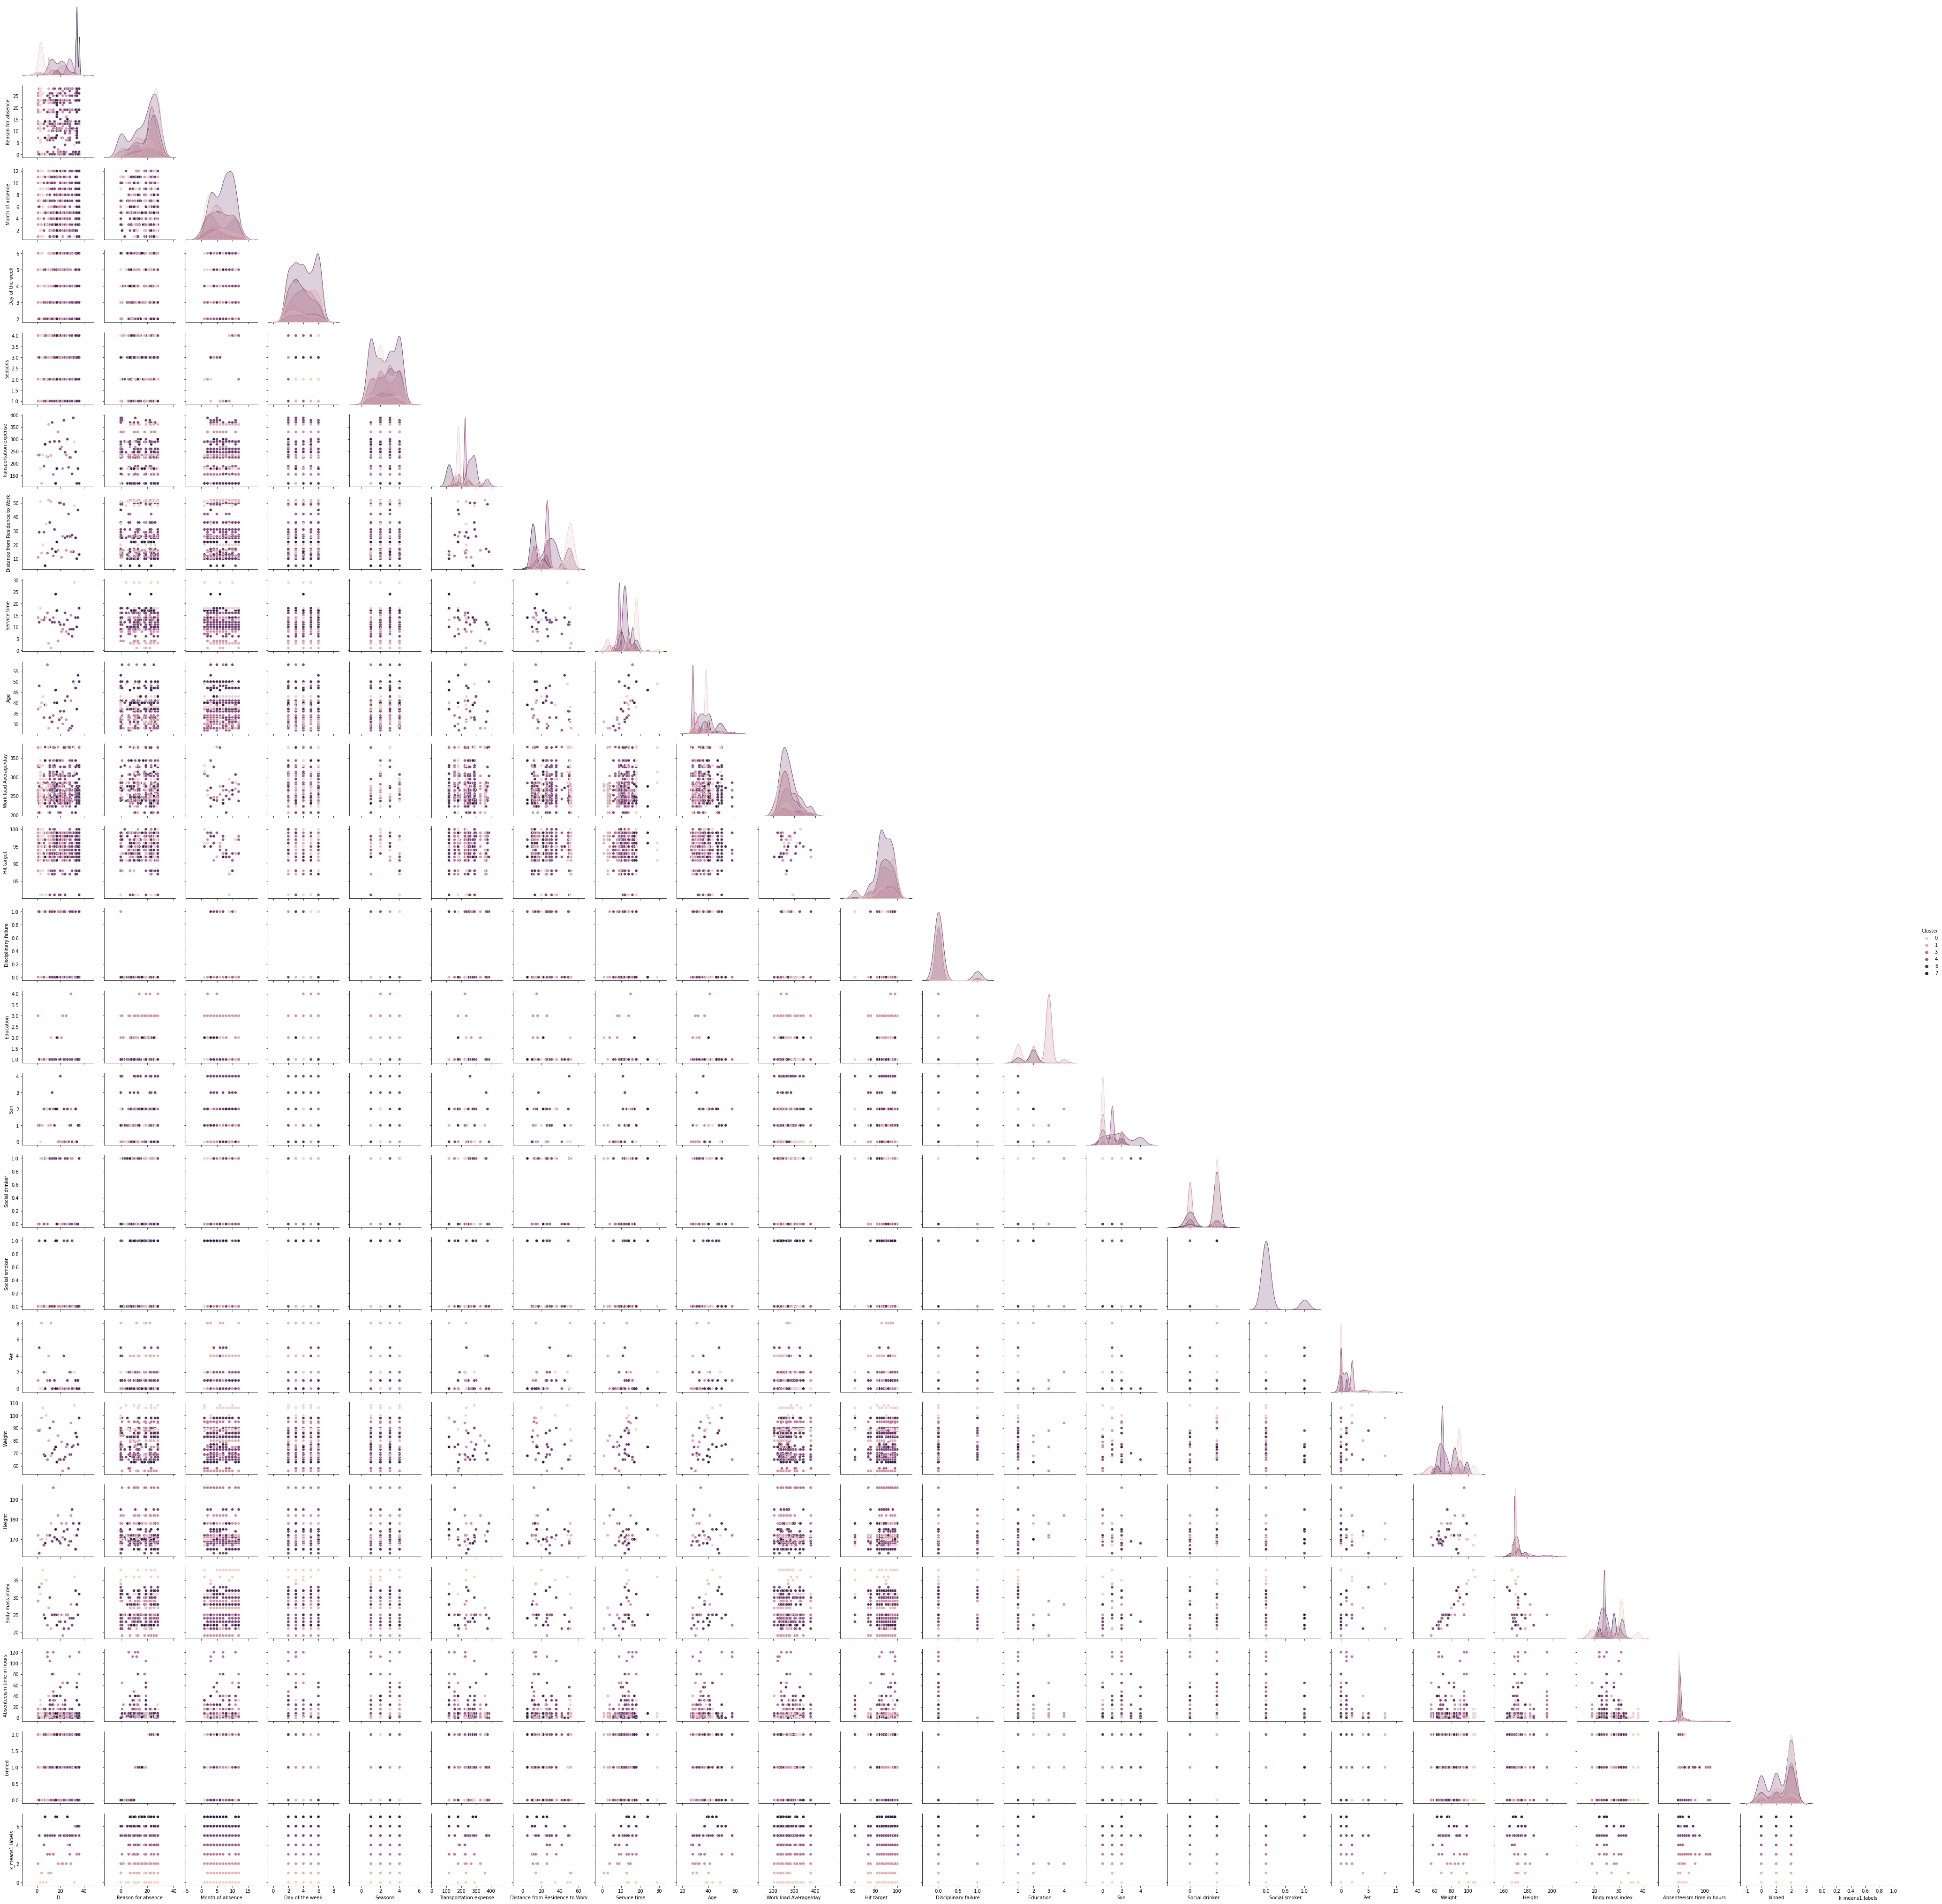

In [ ]:
sb.set_palette("bright")
sb.pairplot(df, kind="scatter", hue ="Cluster", corner=True,)
plt.show()


In [ ]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours', 'binned', 'Cluster'],
      dtype='object')

Cluster Number:  5
[90 65 67 75 88 73 69 70 76 68 77 98 86]
Cluster Number:  6
[98 86 83 77]
Cluster Number:  0
[ 89 106 108 100]
Cluster Number:  7
[68 63 77 75]
Cluster Number:  1
[80 68 98]
Cluster Number:  3
[95 83 98 69 65 90]
Cluster Number:  2
[88 84 56 79 75 94]
Cluster Number:  4
[69 58]


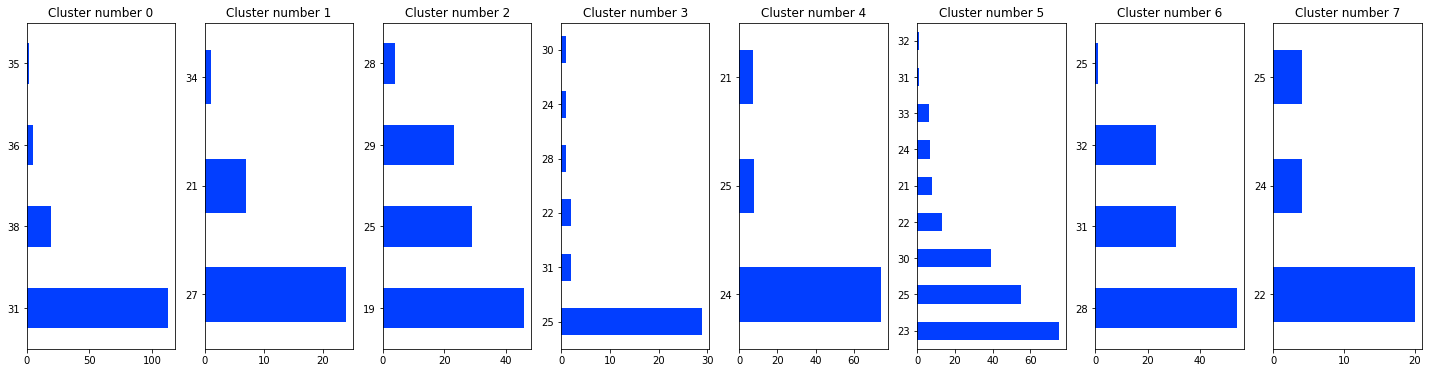

In [ ]:
fig, axs = plt.subplots(ncols=len(df['Cluster'].unique()), figsize=(25, 6))
for Cluster in df['Cluster'].unique():
    
    print('Cluster Number: ', str(Cluster))
    temp_df = df[['Weight','Body mass index','Cluster']][df['Cluster'] == Cluster]
    
    print(temp_df['Weight'].unique())
    temp_df['Body mass index'].value_counts().plot(kind= 'barh',ax=axs[Cluster])
    axs[Cluster].set_title('Cluster number {}'.format(Cluster))
    
    print(10* '====')

# Conclusion:
Here If we check the cluster they are been divided with respect to bmi and weight.
Cluster 0 the bmi is more then 30+ above 30 is obese so we can cluster 0 has obese employees that ti in class 2 obesity since most of them have more 35+.

Cluster 4 and 7 has the healthy employees since they are in range 21 to 25.

cluster 6 and 1 has employee who are over weight and obese.

Cluster 5 2 3  contains employees who healthy , overweight and obese.

simliarly goes for weight and height since bmi is calculated on that basis.




Cluster Number:  5
[289 260 246 157 235 291 225 369 388 378 279 228 300 118 248]
Cluster Number:  6
[118 248 179]
Cluster Number:  0
[179 235 289 231]
Cluster Number:  7
[279 179 300 118]
Cluster Number:  1
[361 233 118]
Cluster Number:  3
[155 118 225 228 289]
Cluster Number:  2
[235 330 179 268 225]
Cluster Number:  4
[189 184 225]


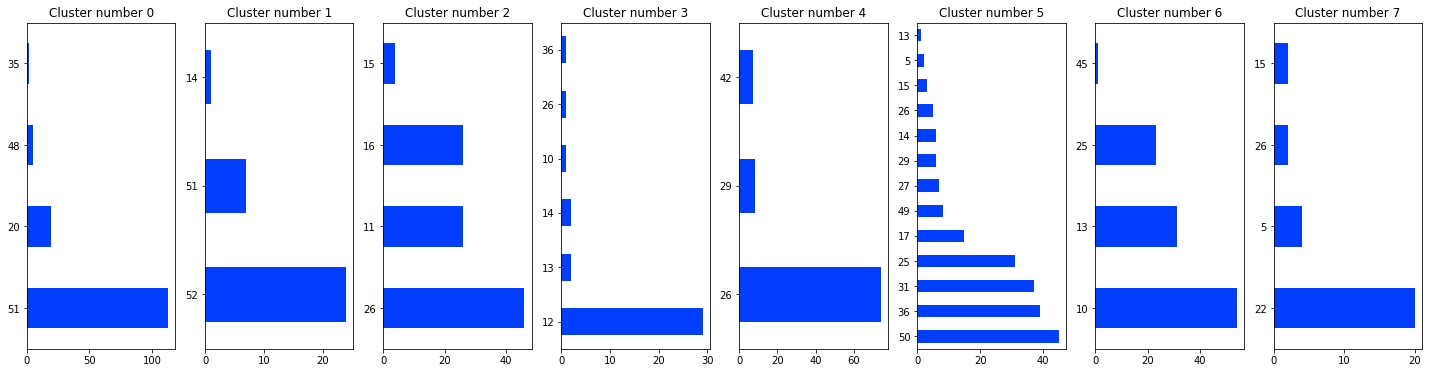

In [ ]:
fig, axs = plt.subplots(ncols=len(df['Cluster'].unique()), figsize=(25, 6))
for Cluster in df['Cluster'].unique():
    
    print('Cluster Number: ', str(Cluster))
    temp_df = df[['Transportation expense','Distance from Residence to Work','Cluster']][df['Cluster'] == Cluster]
    
    print(temp_df['Transportation expense'].unique())
    temp_df['Distance from Residence to Work'].value_counts().plot(kind= 'barh',ax=axs[Cluster])
    axs[Cluster].set_title('Cluster number {}'.format(Cluster))
    
    print(10* '====')

In [ ]:
p_table=pd.pivot_table(df, index=['Cluster'], aggfunc= {'Transportation expense': 'mean','Distance from Residence to Work':'mean'})
p_table

Distance from Residence to Work  Transportation expense
Cluster                                                         
0                              46.424460              191.359712
1                              50.593750              325.406250
2                              19.196078              225.225490
3                              13.166667              161.638889
4                              27.528090              218.539326
5                              33.502439              278.463415
6                              14.339450              145.990826
7                              19.357143              197.571429

# Conclusion: Transportation expense
Cluster 0 ,6,7,3the average cost for employee for using transportation is 
between 140 to 200 .

Cluster 2,4,5 it is between 200 to 300 

Cluster 1 is high more then 300.

#Conclusion: Distance from Residence to Work
we see 	Distance from Residence to Work.

cluster 6,7 3 ,2 employee live nearest to the work place within range of 20 .

cluster 4 , 5 employee live within average radius of 20 to 40 

Cluster 1 and 0 employee live in the  farthest residence with average distance of 40 to 55.